In [1]:
# Fonots

# Használathoz fel kell tölteni a metric_____.log filét ha Google Colabon használod.

import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import os
import pickle
import joblib

import warnings 
# warnings.filterwarnings("ignore")

from datetime import datetime, date, time

from tensorflow import keras
from tensorflow.keras import layers

from rich.progress import track

from termcolor import colored

from sklearn.linear_model import LinearRegression

from pandas.plotting import scatter_matrix

print(tf.__version__)

import time
ost = time.time()

ost = time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())
print(ost)

ost = time.strftime("%H:%M:%S", time.gmtime())
print(ost)

2023-05-24 21:45:59.754369: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-24 21:45:59.989610: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-24 21:45:59.998737: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-24 21:45:59.998753: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

2.10.0
2023-05-24 21:46:02
21:46:02


In [2]:
metric_file_name = 'metric_train_by_none.log'

df = pd.read_csv(metric_file_name, sep=',', header=0)

df.head()

worker_give_metrics write_to_csv_time     time  response_time_p95  \
0       192.168.0.170          20:07:33  20:07:3          170.48660   
1       192.168.0.170          20:07:42  20:07:4          173.23785   
2       192.168.0.170          20:07:51  20:07:5           76.25155   
3       192.168.0.170          20:08:01  20:08:0          169.67600   
4       192.168.0.170          20:08:11  20:08:1           95.18005   

   response_time  worker_number  request_rate  CPU0User%  CPU0Idle%  \
0     122.845000              1           0.4        9.8       69.9   
1     100.906500              3           1.0        9.5       69.5   
2      69.350800              1           1.0        9.7       76.1   
3     103.225818              1           1.1        8.6       79.8   
4      72.214400              1           1.0        9.5       82.2   

   CPU0Total%  ...  [NUMA:0]Mapped  [NUMA:0]Anon  [NUMA:0]AnonH  \
0        15.9  ...         54914.0      727424.8            0.0   
1        15.5  ...         47587.6      725717.6            0.0   
2        15.7  ...         42023.2      724221.6            0.0   
3        14.4  ...         38244.0      723113.6            0.0   
4        16.3  ...         39842.8      724387.2            0.0   

   [NUMA:0]Inactive  [NUMA:0]Hits  [TCPD]InReceives  [TCPD]InDelivers  \
0           42991.2         100.0             182.8             182.8   
1           37337.2         100.0             131.1             131.1   
2           34854.0         100.0             235.0             235.0   
3           28973.2         100.0             264.9             264.9   
4           28122.8         100.0             259.4             259.4   

   [TCPD]OutRequests  [TCPD]InSegs  [TCPD]OutSegs  
0              182.9         182.3          182.4  
1              131.0         131.1          131.1  
2              235.0         235.0          235.1  
3              284.9         264.9          285.0  
4              260.1         259.4          260.2  

[5 rows x 36 columns]

In [3]:
df['worker_give_metrics'].unique()

array(['192.168.0.170'], dtype=object)

In [4]:
df.describe().T

count           mean           std            min  \
response_time_p95  224.0     370.353299    724.126108      67.528050   
response_time      224.0     208.113452    436.441158      53.919527   
worker_number      224.0       4.941964      2.743313       1.000000   
request_rate       224.0      15.723661     12.297403       0.100000   
CPU0User%          224.0      22.253571     16.233290       5.100000   
CPU0Idle%          224.0      50.551339     24.092075       0.100000   
CPU0Total%         224.0      39.916964     29.724984       9.000000   
[DSK:sda]Reads     224.0     107.448661     87.695564       3.800000   
[DSK:sda]RMerge    224.0      81.942411     75.448909       0.000000   
[DSK:sda]RKBytes   224.0    3428.738393   2950.415061     146.800000   
[DSK:sda]WaitR     224.0       1.181250      0.578545       0.200000   
[DSK:sda]Writes    224.0      11.944196     10.057648       0.200000   
[DSK:sda]WMerge    224.0       2.025893      0.681497       0.500000   
[DSK:sda]WKBytes   224.0      94.387500    479.547980       3.200000   
[DSK:sda]WaitW     224.0       0.803125      0.334073       0.400000   
[DSK:sda]Request   224.0      21.215625     11.616000       5.700000   
[DSK:sda]QueLen    224.0       0.042857      0.061687       0.000000   
[DSK:sda]Wait      224.0       1.560714      0.463726       0.500000   
[DSK:sda]SvcTim    224.0       1.599107      0.488155       0.400000   
[DSK:sda]Util      224.0      17.462500     12.864479       1.100000   
[NUMA:0]Used       224.0  930282.435714   7169.697052  906185.200000   
[NUMA:0]Free       224.0   74429.564286   7169.697052   63453.200000   
[NUMA:0]Slab       224.0   88173.267857    973.428050   86218.400000   
[NUMA:0]Mapped     224.0   37808.751786   5461.416017   27806.000000   
[NUMA:0]Anon       224.0  743808.203571  12665.790151  722512.000000   
[NUMA:0]AnonH      224.0       0.000000      0.000000       0.000000   
[NUMA:0]Inactive   224.0   31005.332143   4313.345708   21418.000000   
[NUMA:0]Hits       224.0     100.000000      0.000000     100.000000   
[TCPD]InReceives   224.0    1033.900000    947.062164       1.600000   
[TCPD]InDelivers   224.0    1033.900000    947.062164       1.600000   
[TCPD]OutRequests  224.0    1474.991071   1691.631456       1.800000   
[TCPD]InSegs       224.0    1033.821429    947.060607       1.600000   
[TCPD]OutSegs      224.0    1475.039286   1691.707518       1.800000   

                             25%            50%            75%            max  
response_time_p95      84.439000      94.528150     145.046737    2800.500400  
response_time          70.298126      73.024617      87.004650    2415.910126  
worker_number           3.000000       5.000000       7.000000       9.000000  
request_rate            4.900000      13.750000      24.350000      40.100000  
CPU0User%               9.600000      14.850000      34.850000      57.800000  
CPU0Idle%              33.975000      59.300000      67.125000      86.300000  
CPU0Total%             16.175000      26.500000      63.775000      99.900000  
[DSK:sda]Reads         36.850000      65.500000     212.000000     307.100000  
[DSK:sda]RMerge        13.775000      53.350000     158.875000     238.800000  
[DSK:sda]RKBytes     1072.650000    1974.700000    6720.025000   10954.500000  
[DSK:sda]WaitR          0.600000       1.100000       1.700000       2.500000  
[DSK:sda]Writes         0.400000      14.550000      19.400000      40.700000  
[DSK:sda]WMerge         1.500000       2.100000       2.600000       3.900000  
[DSK:sda]WKBytes        8.400000      70.650000      92.950000    7172.800000  
[DSK:sda]WaitW          0.600000       0.800000       0.900000       3.400000  
[DSK:sda]Request       11.000000      18.500000      31.150000      50.400000  
[DSK:sda]QueLen         0.000000       0.000000       0.100000       0.200000  
[DSK:sda]Wait           1.200000       1.600000       1.900000       2.800000  
[DSK:sda]SvcTim         1.300000       1.600000   

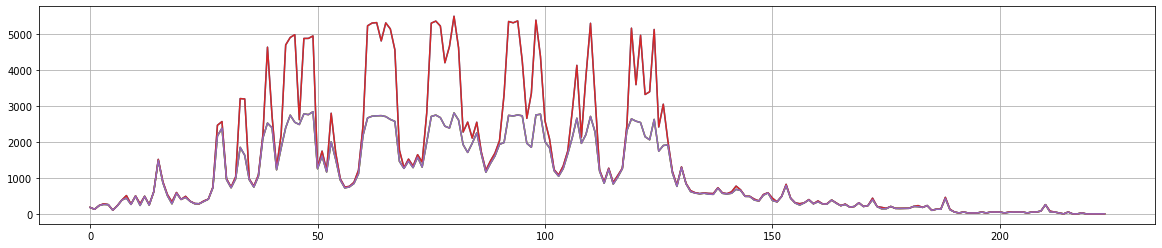

In [5]:
plt.figure(figsize=(20,4))
plt.plot(df['[TCPD]OutRequests'])
plt.plot(df['[TCPD]InDelivers'])
plt.plot(df['[TCPD]InReceives'])
plt.plot(df['[TCPD]OutSegs'])
plt.plot(df['[TCPD]InSegs'])
plt.grid()
plt.show()

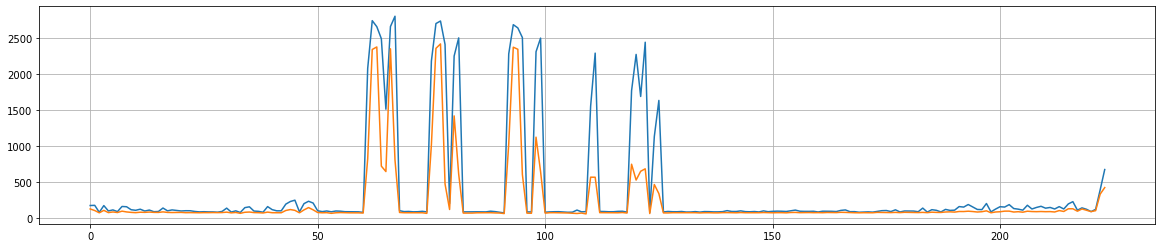

In [6]:
plt.figure(figsize=(20,4))
plt.plot(df['response_time_p95'])
plt.plot(df['response_time'])
plt.grid()
# plt.grid(axis='y')
plt.show()

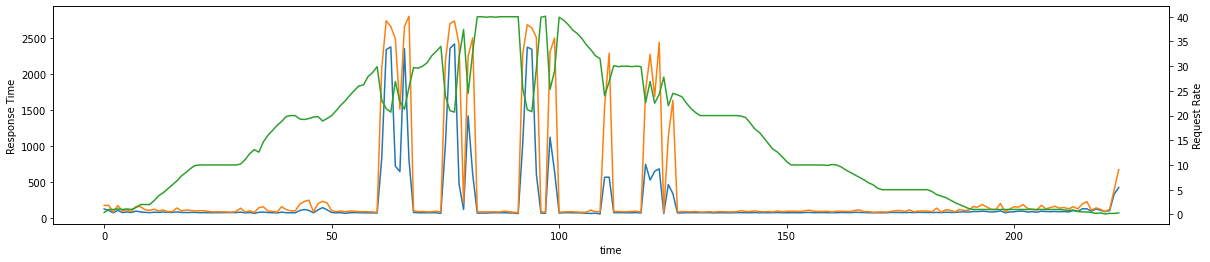

In [7]:
fig, ax1 = plt.subplots(figsize=(20, 4))

ax1.plot(df['response_time'], label = 'RT', color = 'C0')
ax1.plot(df['response_time_p95'], label = 'RT95%', color = 'C1')

ax2 = ax1.twinx()

ax2.plot(df['request_rate'], label = 'RR', color = 'C2')

ax1.set_xlabel('time')
ax1.set_ylabel('Response Time')
ax2.set_ylabel('Request Rate')

plt.show()

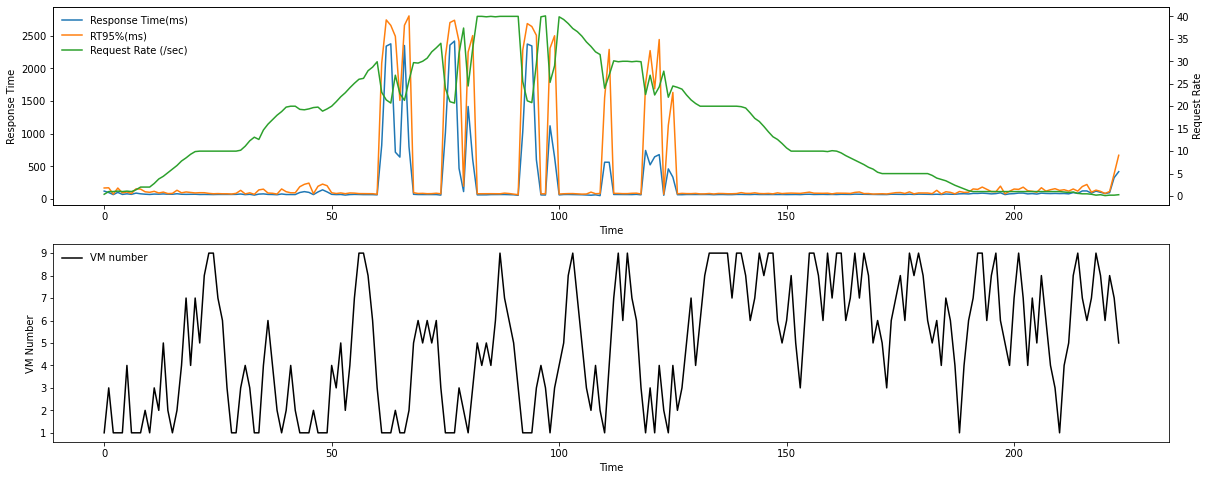

In [8]:
fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(20, 8))

l1 = ax1.plot(df['response_time'], color = 'C0', label='Response Time(ms)')
l2 = ax1.plot(df['response_time_p95'], color = 'C1', label='RT95%(ms)')

ax2 = ax1.twinx()

l3 = ax2.plot(df['request_rate'], color = 'C2', label='Request Rate (/sec)')

ax1.set_xlabel('Time')
ax1.set_ylabel('Response Time')
ax2.set_ylabel('Request Rate')

ax3.plot(df['worker_number'], color = 'black', label='VM number')
ax3.set_xlabel('Time')
ax3.set_ylabel('VM Number')
ax3.legend(loc=2, frameon=False)

lns = l1+l2+l3
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=2, frameon=False)

plt.show()

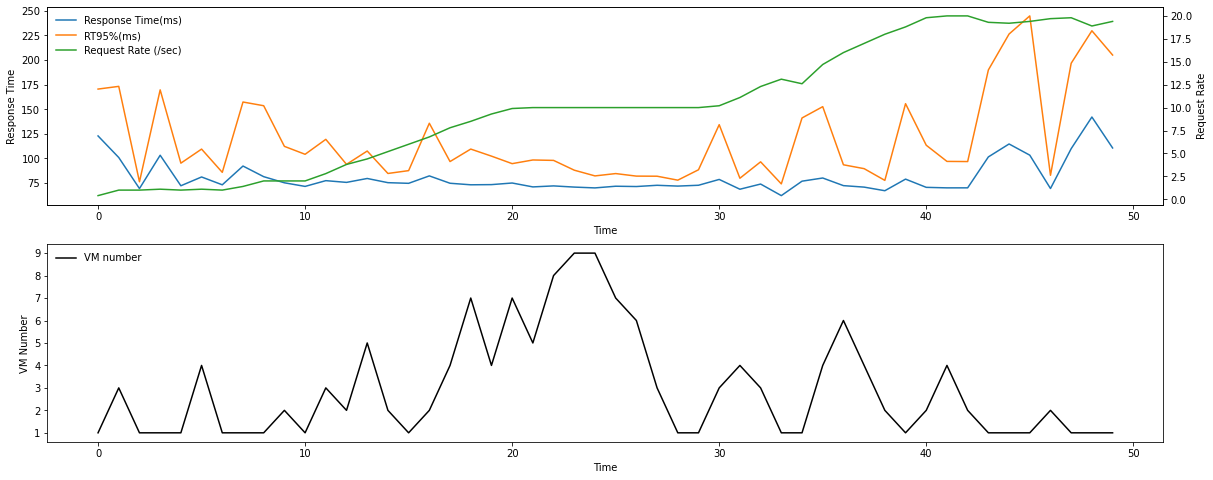

In [9]:
FROM = 0
TO   = 50

fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(20, 8))

l1 = ax1.plot(df['response_time'][FROM:TO], color = 'C0', label='Response Time(ms)')
l2 = ax1.plot(df['response_time_p95'][FROM:TO], color = 'C1', label='RT95%(ms)')

ax2 = ax1.twinx()

l3 = ax2.plot(df['request_rate'][FROM:TO], color = 'C2', label='Request Rate (/sec)')

ax1.set_xlabel('Time')
ax1.set_ylabel('Response Time')
ax2.set_ylabel('Request Rate')

ax3.plot(df['worker_number'][FROM:TO], color = 'black', label='VM number')
ax3.set_xlabel('Time')
ax3.set_ylabel('VM Number')
ax3.legend(loc=2, frameon=False)

lns = l1+l2+l3
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=2, frameon=False)

plt.show()

In [10]:
df.iloc[:, 0:7].describe()

response_time_p95  response_time  worker_number  request_rate
count         224.000000     224.000000     224.000000    224.000000
mean          370.353299     208.113452       4.941964     15.723661
std           724.126108     436.441158       2.743313     12.297403
min            67.528050      53.919527       1.000000      0.100000
25%            84.439000      70.298126       3.000000      4.900000
50%            94.528150      73.024617       5.000000     13.750000
75%           145.046737      87.004650       7.000000     24.350000
max          2800.500400    2415.910126       9.000000     40.100000

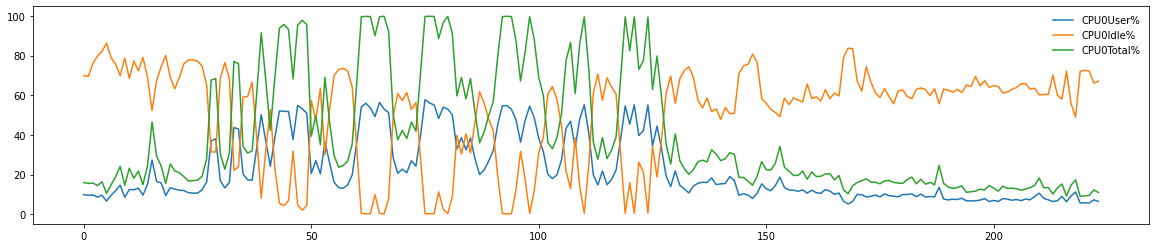

In [11]:
def plot_timeseries_metrics(name: str):

    plt.figure(figsize=(20, 4))

    for col_name in df.columns:
        if name in col_name:
            if df[col_name].describe()[2] > 0:
                plt.plot(df[col_name], label = col_name)

    plt.legend(frameon=False)
    plt.show()

plot_timeseries_metrics('CPU')

In [12]:
df.iloc[:, 7:10].describe()

CPU0User%   CPU0Idle%  CPU0Total%
count  224.000000  224.000000  224.000000
mean    22.253571   50.551339   39.916964
std     16.233290   24.092075   29.724984
min      5.100000    0.100000    9.000000
25%      9.600000   33.975000   16.175000
50%     14.850000   59.300000   26.500000
75%     34.850000   67.125000   63.775000
max     57.800000   86.300000   99.900000

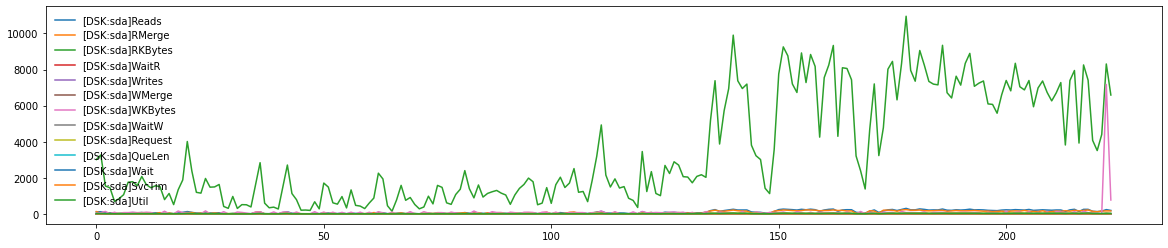

In [13]:
plot_timeseries_metrics('DSK')

In [14]:
df.iloc[:, 10:23].describe()

[DSK:sda]Reads  [DSK:sda]RMerge  [DSK:sda]RKBytes  [DSK:sda]WaitR  \
count      224.000000       224.000000        224.000000      224.000000   
mean       107.448661        81.942411       3428.738393        1.181250   
std         87.695564        75.448909       2950.415061        0.578545   
min          3.800000         0.000000        146.800000        0.200000   
25%         36.850000        13.775000       1072.650000        0.600000   
50%         65.500000        53.350000       1974.700000        1.100000   
75%        212.000000       158.875000       6720.025000        1.700000   
max        307.100000       238.800000      10954.500000        2.500000   

       [DSK:sda]Writes  [DSK:sda]WMerge  [DSK:sda]WKBytes  [DSK:sda]WaitW  \
count       224.000000       224.000000         224.00000      224.000000   
mean         11.944196         2.025893          94.38750        0.803125   
std          10.057648         0.681497         479.54798        0.334073   
min           0.200000         0.500000           3.20000        0.400000   
25%           0.400000         1.500000           8.40000        0.600000   
50%          14.550000         2.100000          70.65000        0.800000   
75%          19.400000         2.600000          92.95000        0.900000   
max          40.700000         3.900000        7172.80000        3.400000   

       [DSK:sda]Request  [DSK:sda]QueLen  [DSK:sda]Wait  [DSK:sda]SvcTim  \
count        224.000000       224.000000     224.000000       224.000000   
mean          21.215625         0.042857       1.560714         1.599107   
std           11.616000         0.061687       0.463726         0.488155   
min            5.700000         0.000000       0.500000         0.400000   
25%           11.000000         0.000000       1.200000         1.300000   
50%           18.500000         0.000000       1.600000         1.600000   
75%           31.150000         0.100000       1.900000         1.900000   
max           50.400000         0.200000       2.800000         3.600000   

       [DSK:sda]Util  
count     224.000000  
mean       17.462500  
std        12.864479  
min         1.100000  
25%         6.575000  
50%        11.600000  
75%        32.400000  
max        47.000000

In [15]:
df.iloc[:, 23:31].describe()

[NUMA:0]Used  [NUMA:0]Free  [NUMA:0]Slab  [NUMA:0]Mapped  \
count     224.000000    224.000000    224.000000      224.000000   
mean   930282.435714  74429.564286  88173.267857    37808.751786   
std      7169.697052   7169.697052    973.428050     5461.416017   
min    906185.200000  63453.200000  86218.400000    27806.000000   
25%    927412.000000  69324.500000  87228.500000    33527.900000   
50%    931523.600000  73188.400000  88444.000000    36541.200000   
75%    935387.500000  77300.000000  88775.100000    40975.600000   
max    941258.800000  98526.800000  90460.400000    54914.000000   

        [NUMA:0]Anon  [NUMA:0]AnonH  [NUMA:0]Inactive  [NUMA:0]Hits  
count     224.000000          224.0        224.000000         224.0  
mean   743808.203571            0.0      31005.332143         100.0  
std     12665.790151            0.0       4313.345708           0.0  
min    722512.000000            0.0      21418.000000         100.0  
25%    730075.100000            0.0      27737.700000         100.0  
50%    747827.000000            0.0      30769.200000         100.0  
75%    755090.800000            0.0      34270.100000         100.0  
max    758834.800000            0.0      42991.200000         100.0

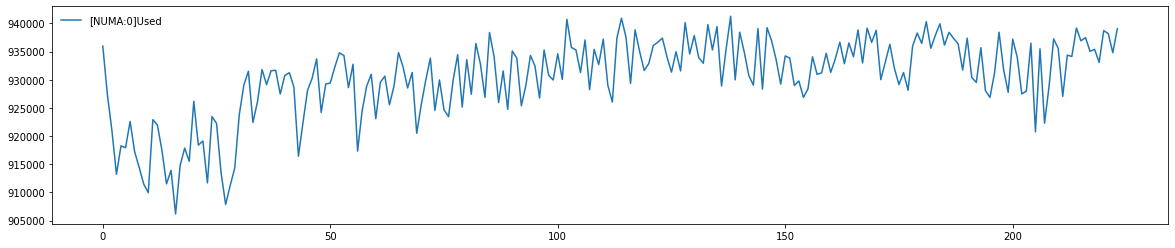

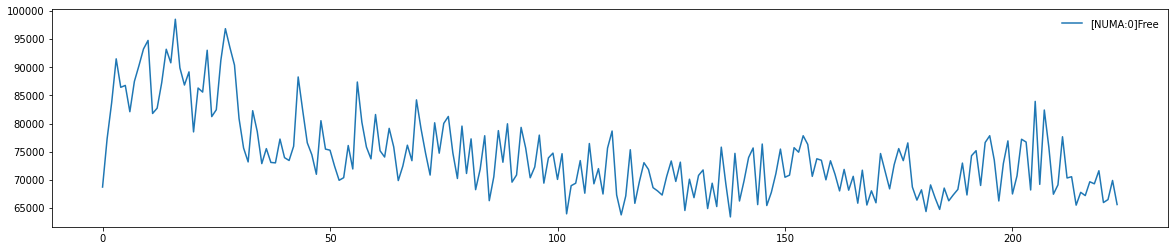

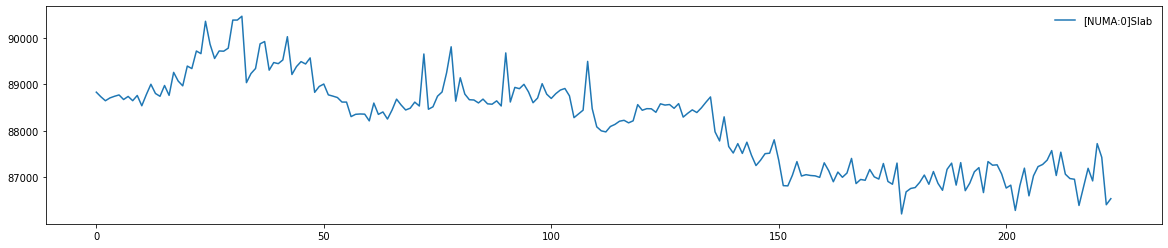

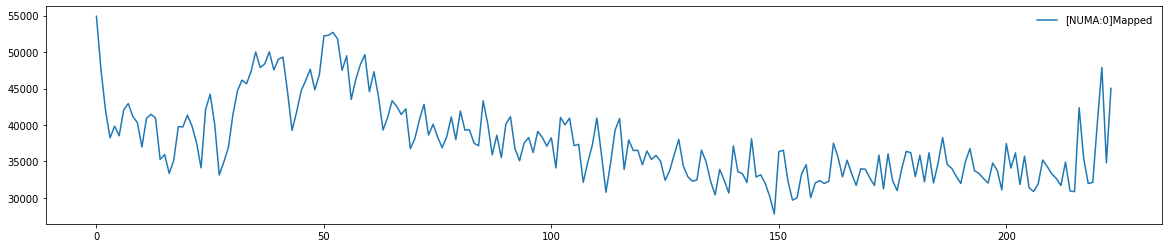

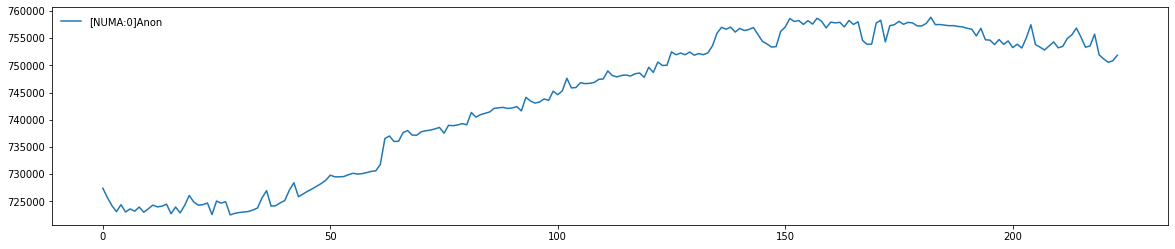

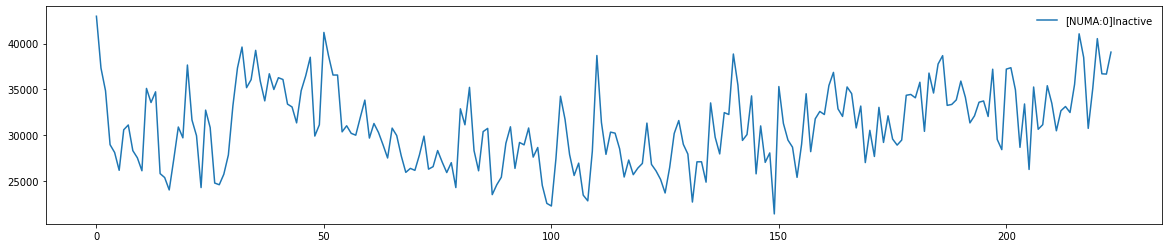

In [16]:
def plot_timeseries_metrics_separate(name: str):

    for col_name in df.columns:
        if name in col_name:
            if df[col_name].describe()[2] > 0:
                plt.figure(figsize=(20, 4))
                plt.ticklabel_format(useOffset=False)
                plt.ticklabel_format(style='plain')
                plt.plot(df[col_name], label = col_name)
                plt.legend(frameon=False)
                plt.show()

plot_timeseries_metrics_separate('NUMA')

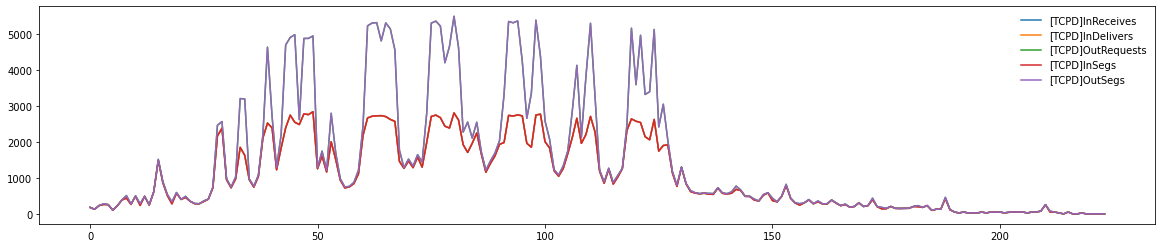

In [17]:
plot_timeseries_metrics('TCP')

## Before metric After metric

Itt állítom elő a metrikából a before after értékeket

Ennek a prototípusát dolgoztam ki és ellenőriztem le itt.

In [18]:
mf = df.copy()

mf['actual_vm_number_is'] = mf['worker_number']
mf['actual_vm_number_was'] = mf['worker_number'].shift(1)
mf['actual_vm_number_will'] = mf['worker_number'].shift(-1)

mf['delta_vm'] = mf['actual_vm_number_will'] - mf['actual_vm_number_is']

mf.head()

worker_give_metrics write_to_csv_time     time  response_time_p95  \
0       192.168.0.170          20:07:33  20:07:3          170.48660   
1       192.168.0.170          20:07:42  20:07:4          173.23785   
2       192.168.0.170          20:07:51  20:07:5           76.25155   
3       192.168.0.170          20:08:01  20:08:0          169.67600   
4       192.168.0.170          20:08:11  20:08:1           95.18005   

   response_time  worker_number  request_rate  CPU0User%  CPU0Idle%  \
0     122.845000              1           0.4        9.8       69.9   
1     100.906500              3           1.0        9.5       69.5   
2      69.350800              1           1.0        9.7       76.1   
3     103.225818              1           1.1        8.6       79.8   
4      72.214400              1           1.0        9.5       82.2   

   CPU0Total%  ...  [NUMA:0]Hits  [TCPD]InReceives  [TCPD]InDelivers  \
0        15.9  ...         100.0             182.8             182.8   
1        15.5  ...         100.0             131.1             131.1   
2        15.7  ...         100.0             235.0             235.0   
3        14.4  ...         100.0             264.9             264.9   
4        16.3  ...         100.0             259.4             259.4   

   [TCPD]OutRequests  [TCPD]InSegs  [TCPD]OutSegs  actual_vm_number_is  \
0              182.9         182.3          182.4                    1   
1              131.0         131.1          131.1                    3   
2              235.0         235.0          235.1                    1   
3              284.9         264.9          285.0                    1   
4              260.1         259.4          260.2                    1   

   actual_vm_number_was  actual_vm_number_will  delta_vm  
0                   NaN                    3.0       2.0  
1                   1.0                    1.0      -2.0  
2                   3.0                    1.0       0.0  
3                   1.0                    1.0       0.0  
4                   1.0                    4.0       3.0  

[5 rows x 40 columns]

In [19]:
mf['delta_vm'].unique()

array([ 2., -2.,  0.,  3., -3.,  1., -1., nan])

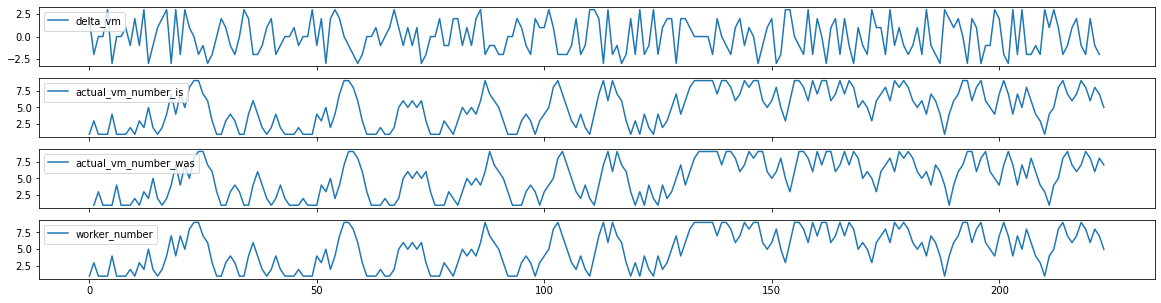

In [20]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 5), sharex=True)

ax1.plot(mf['delta_vm'], label='delta_vm'); ax1.legend()
ax2.plot(mf['actual_vm_number_is'], label='actual_vm_number_is'); ax2.legend()
ax3.plot(mf['actual_vm_number_was'], label='actual_vm_number_was'); ax3.legend()
ax4.plot(mf['worker_number'], label='worker_number'); ax4.legend()
plt.show()

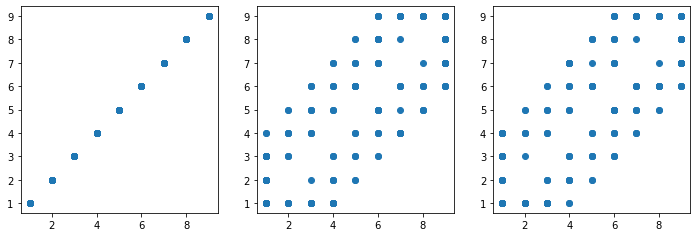

In [21]:
# Ellenőrzés (mert úgy tűnik, hogy a két adatbázisban az éppen aktuális VM szám mindhat egy kicsit mozogna)

fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(12, 3.8))
ax0.scatter(mf['worker_number'], mf['actual_vm_number_is'])
ax1.scatter(mf['worker_number'], mf['actual_vm_number_was'])
ax2.scatter(mf['worker_number'], mf['actual_vm_number_will'])
plt.show()

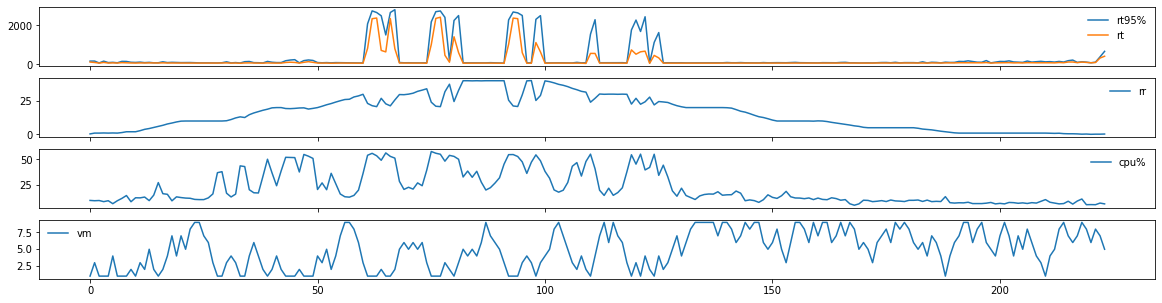

In [22]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 5), sharex=True)

ax1.plot(mf['response_time_p95'], label='rt95%'); ax1.legend(frameon=False)
ax1.plot(mf['response_time'], label='rt');        ax1.legend(frameon=False)
ax2.plot(mf['request_rate'], label='rr');         ax2.legend(frameon=False)
ax3.plot(mf['CPU0User%'], label='cpu%');          ax3.legend(frameon=False)
ax4.plot(mf['worker_number'], label='vm');        ax4.legend(frameon=False)
plt.show()

In [23]:
ff = mf[['time', 'response_time', 'worker_number', 'request_rate', 'CPU0User%', 'actual_vm_number_is', 'actual_vm_number_will', 'delta_vm']].copy()

f2 = ff.reset_index(drop=True) # nem használom, de ha le kéne resetelni az indexet

ff.head()

time  response_time  worker_number  request_rate  CPU0User%  \
0  20:07:3     122.845000              1           0.4        9.8   
1  20:07:4     100.906500              3           1.0        9.5   
2  20:07:5      69.350800              1           1.0        9.7   
3  20:08:0     103.225818              1           1.1        8.6   
4  20:08:1      72.214400              1           1.0        9.5   

   actual_vm_number_is  actual_vm_number_will  delta_vm  
0                    1                    3.0       2.0  
1                    3                    1.0      -2.0  
2                    1                    1.0       0.0  
3                    1                    1.0       0.0  
4                    1                    4.0       3.0

In [24]:
# cpu' = c0 + c1 * cpu * worker_number/(worker_number + delta_vm) + c2 * cpu * delta_vm/(worker_number + delta_vm)

# m'   = c0 + c1 · m · w/(w + k) + c2 · m · k/(w + k)

# metrics[i]=numpy.dot(bvalues[i],[(metrics[i]*w)/(w+k),(metrics[i]*k)/(w+k),1])

In [25]:
# A time a metrikához tartozik
# a otime a scalerhez
# 19:57:4 kor mérünk valamit (91.6)
# --> az is egy külön jó kérdés, hogy ez mikor kerül birásra a rendszerbe (19:57:4 (0) vagy (9))
# ----> megoldás lehet, hogy beteszek a scaler programba egy időbőjeget is, hogy mikor íra be ezt az adatot

# A sclaer 19:57:42-kor végrehajt egy skálázást

# Ennek az eredménye logikus, hogy csak a 19:57:5 metric mérésnél jelenhet meg

In [26]:
f1 = ff.copy()
f1['CPU0User%Next'] = f1['CPU0User%'].shift(-1)
f1['CPU0User%Prev'] = f1['CPU0User%'].shift(+1)
f1.tail()

time  response_time  worker_number  request_rate  CPU0User%  \
219  20:44:0     103.914000              8           0.3        5.6   
220  20:44:5      86.012000              6           0.1        5.7   
221  20:59:3      99.209500              8           0.2        5.6   
222  20:59:4     328.960000              7           0.2        7.2   
223  21:01:5     419.907333              5           0.3        6.4   

     actual_vm_number_is  actual_vm_number_will  delta_vm  CPU0User%Next  \
219                    8                    6.0      -2.0            5.7   
220                    6                    8.0       2.0            5.6   
221                    8                    7.0      -1.0            7.2   
222                    7                    5.0      -2.0            6.4   
223                    5                    NaN       NaN            NaN   

     CPU0User%Prev  
219           11.2  
220            5.6  
221            5.7  
222            5.6  
223            7.2

In [27]:
# viszont csak ott kell figyelmebe venni a bf-af értéket ahol ténylegesen volt skálázás

In [28]:
f2 = f1.dropna()
f2.tail()

time  response_time  worker_number  request_rate  CPU0User%  \
218  20:43:5       122.8730              9           0.2       11.2   
219  20:44:0       103.9140              8           0.3        5.6   
220  20:44:5        86.0120              6           0.1        5.7   
221  20:59:3        99.2095              8           0.2        5.6   
222  20:59:4       328.9600              7           0.2        7.2   

     actual_vm_number_is  actual_vm_number_will  delta_vm  CPU0User%Next  \
218                    9                    8.0      -1.0            5.6   
219                    8                    6.0      -2.0            5.7   
220                    6                    8.0       2.0            5.6   
221                    8                    7.0      -1.0            7.2   
222                    7                    5.0      -2.0            6.4   

     CPU0User%Prev  
218            9.2  
219           11.2  
220            5.6  
221            5.7  
222            5.6

In [29]:
# Az lenne a korrekt ha kidobnám azokat ahol nem volt skálázás (delta_vm == 0)

indexAge = f2[ (f2['delta_vm'] == 0) ].index
f2.drop(indexAge , inplace=True)

f2.tail()

/home/ubuntu/notebook/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


time  response_time  worker_number  request_rate  CPU0User%  \
218  20:43:5       122.8730              9           0.2       11.2   
219  20:44:0       103.9140              8           0.3        5.6   
220  20:44:5        86.0120              6           0.1        5.7   
221  20:59:3        99.2095              8           0.2        5.6   
222  20:59:4       328.9600              7           0.2        7.2   

     actual_vm_number_is  actual_vm_number_will  delta_vm  CPU0User%Next  \
218                    9                    8.0      -1.0            5.6   
219                    8                    6.0      -2.0            5.7   
220                    6                    8.0       2.0            5.6   
221                    8                    7.0      -1.0            7.2   
222                    7                    5.0      -2.0            6.4   

     CPU0User%Prev  
218            9.2  
219           11.2  
220            5.6  
221            5.7  
222            5.6

In [30]:
# Van-e bárhol NaN

f2['CPU0User%'].isnull().values.any()

for _ in f2.columns:
    print(f2[_].isnull().values.any())

# (3) Check for NaN under an entire DataFrame

print(f2.isnull().values.any())

# (4) Count the NaN under an entire DataFrame

print(f2.isnull().sum())

False
False
False
False
False
False
False
False
False
False
False
time                     0
response_time            0
worker_number            0
request_rate             0
CPU0User%                0
actual_vm_number_is      0
actual_vm_number_will    0
delta_vm                 0
CPU0User%Next            0
CPU0User%Prev            0
dtype: int64


In [31]:
f3 = f2.copy()
f3['cpu_term1'] = f3['CPU0User%'] * f3['worker_number']/(f3['worker_number'] + f3['delta_vm'])
f3['cpu_term2'] = f3['CPU0User%'] * f3['delta_vm']/(f3['worker_number'] + f3['delta_vm'])

In [32]:
print(f3['cpu_term1'].min())
print(f3['cpu_term1'].max())

print(f3['cpu_term2'].min())
print(f3['cpu_term2'].max())

2.375
141.89999999999998
-94.6
41.400000000000006


In [33]:
# cpu' = c0 + c1 * cpu * worker_number/(worker_number + delta_vm) + c2 * cpu * delta_vm/(worker_number + delta_vm)

# m'   = c0 + c1 · m · w/(w + k) + c2 · m · k/(w + k)

In [34]:
# Ez a jó

# A jelenlegi a lapján 'CPU0USer' becsüljük a következő értéket 'CPU0User%Next'

f3 = f2.copy()
f3['cpu_term1'] = f3['CPU0User%'] * f3['worker_number']/(f3['worker_number'] + f3['delta_vm'])
f3['cpu_term2'] = f3['CPU0User%'] * f3['delta_vm']/(f3['worker_number'] + f3['delta_vm'])

# --

_cpu_term = f3[['cpu_term1', 'cpu_term2']]          # jelenlegiekből összeállított term

_cpu_next = f3['CPU0User%Next']                     # a következő mérés értéke

print(_cpu_term.shape, _cpu_next.shape)

lr = LinearRegression(fit_intercept=True)

rr = lr.fit(_cpu_term, _cpu_next)

with np.printoptions(precision=2, suppress=True):
    print('score %.2f' % rr.score(_cpu_term, _cpu_next))
    print('coef', rr.coef_)
    print('icpet %.2f' % rr.intercept_)

pred_cpu = rr.predict(_cpu_term)

(194, 2) (194,)
score 0.89
coef [0.87 0.58]
icpet 1.86


In [35]:
# Átállítom a színeket

from cycler import cycler
import matplotlib as mpl

colormap = plt.get_cmap('jet')
colors = [colormap(k) for k in np.linspace(0, 1, 10)]

mpl.rcParams['axes.prop_cycle'] = cycler(color=colors)

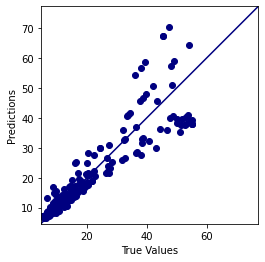

In [36]:
def plot_true_vs_pred(true, pred):
    plt.axes(aspect='equal')
    plt.scatter(true, pred)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    _min = np.min((np.min(true), np.min(pred)))
    _max = np.max((np.max(true), np.max(pred)))
    _min -= _min/10
    _max += _max/10
    lims = [_min, _max]
    plt.xlim(lims)
    plt.ylim(lims)
    _ = plt.plot(lims, lims)
    plt.show()

plot_true_vs_pred(f3['CPU0User%'], pred_cpu)

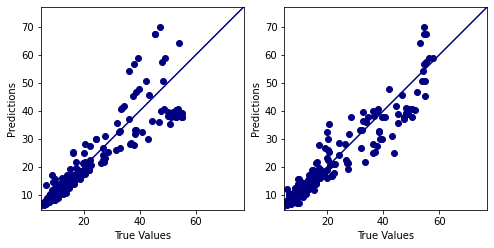

In [37]:
def plot_true_vs_pred_two(true1, pred1, true2, pred2):
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(4.0*2, 4.0))
    
    ax0.axis('equal')
    ax0.set_aspect('equal', 'box')
    ax0.scatter(true1, pred1)
    ax0.set_xlabel('True Values')
    ax0.set_ylabel('Predictions')
    _min = np.min((np.min(true1), np.min(pred1)))
    _max = np.max((np.max(true1), np.max(pred1)))
    _min -= _min/10
    _max += _max/10
    lims = [_min, _max]
    ax0.set_xlim(lims)
    ax0.set_ylim(lims)
    _ = ax0.plot(lims, lims)
    
    ax1.axis('equal')
    ax1.set_aspect('equal', 'box')
    ax1.scatter(true2, pred2)
    ax1.set_xlabel('True Values')
    ax1.set_ylabel('Predictions')
    _min = np.min((np.min(true1), np.min(pred1)))
    _max = np.max((np.max(true1), np.max(pred1)))
    _min -= _min/10
    _max += _max/10
    lims = [_min, _max]
    ax1.set_xlim(lims)
    ax1.set_ylim(lims)
    _ = ax1.plot(lims, lims)
    
    plt.show()

plot_true_vs_pred_two(f3['CPU0User%'], pred_cpu, f3['CPU0User%Next'], pred_cpu)

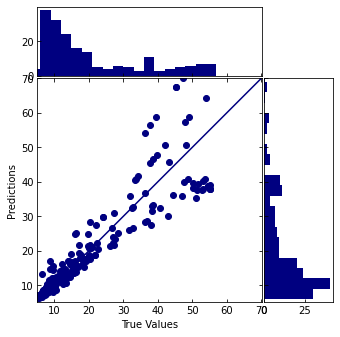

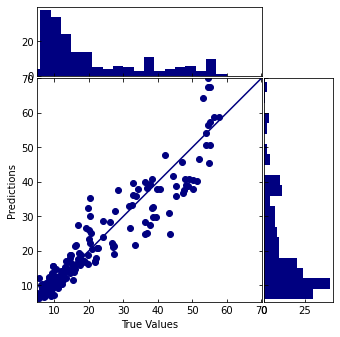

In [38]:
def plot_true_vs_pred_hist(true, pred):

    # definitions for the axes
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    spacing = 0.005

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom + height + spacing, width, 0.2]
    rect_histy = [left + width + spacing, bottom, 0.2, height]

    # start with a rectangular Figure
    plt.figure(figsize=(4.8, 4.8))

    ax_scatter = plt.axes(rect_scatter)
    ax_scatter.tick_params(direction='in', top=True, right=True)
    ax_histx = plt.axes(rect_histx)
    ax_histx.tick_params(direction='in', labelbottom=False)
    ax_histy = plt.axes(rect_histy)
    ax_histy.tick_params(direction='in', labelleft=False)

    # the scatter plot:
    ax_scatter.scatter(true, pred)

    # now determine nice limits by hand:
    binwidth = 3.00
    lim = np.ceil(np.abs([true, pred]).max() / binwidth) * binwidth
    
    _min = np.min((np.min(true), np.min(pred)))
    _max = np.max((np.max(true), np.max(pred)))
    #_min -= _min/10
    #_max += _max/10
    lims = [_min, _max]
    ax_scatter.plot(lims, lims)
    
    ax_scatter.set_xlim((lims))
    ax_scatter.set_ylim((lims))
    ax_scatter.set_xlabel('True Values')
    ax_scatter.set_ylabel('Predictions')

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(true, bins=bins)
    ax_histy.hist(pred, bins=bins, orientation='horizontal')

    ax_histx.set_xlim(ax_scatter.get_xlim())
    ax_histy.set_ylim(ax_scatter.get_ylim())

    plt.show()

plot_true_vs_pred_hist(f3['CPU0User%'].values, pred_cpu)
plot_true_vs_pred_hist(f3['CPU0User%Next'].values, pred_cpu)

In [39]:
def plot_pred(pred_rt):
    fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(20, 8))

    l1 = ax1.plot(df['response_time'], color = 'C0', label='Response Time(ms)')
    l2 = ax1.plot(df['response_time_p95'], color = 'C1', label='RT95%(ms)')
    l3 = ax1.plot(pred_rt, color = 'C10', ls = '--', label='Pred RT(ms)')

    ax2 = ax1.twinx()

    l4 = ax2.plot(df['request_rate'], color = 'C2', label='Request Rate (/sec)')

    ax1.set_xlabel('Time')
    ax1.set_ylabel('Response Time')
    ax2.set_ylabel('Request Rate')

    ax3.plot(df['worker_number'], color = 'black', label='VM number')
    ax3.set_xlabel('Time')
    ax3.set_ylabel('VM Number')
    ax3.legend(loc=2, frameon=False)

    lns = l1+l2+l3+l4
    labs = [l.get_label() for l in lns]
    ax2.legend(lns, labs, loc=2, frameon=False)

    plt.show()

In [40]:
def plot_pred_with_res(train_labels, pred_rt):
    'https://www.geeksforgeeks.org/how-to-create-different-subplot-sizes-in-matplotlib'
    fig, (ax1, ax0, ax3) = plt.subplots(3, 1, figsize=(20, 8), gridspec_kw={'height_ratios': [3, 1, 1]})

    l1 = ax1.plot(df['response_time'], color = 'C0', label='Response Time(ms)')
    l2 = ax1.plot(df['response_time_p95'], color = 'C1', label='RT95%(ms)')
    l3 = ax1.plot(pred_rt, color = 'C10', ls = '--', label='Pred RT(ms)')

    ax2 = ax1.twinx()

    l4 = ax2.plot(df['request_rate'], color = 'C2', label='Request Rate (/sec)')

    ax1.set_xlabel('Time')
    ax1.set_ylabel('Response Time')
    ax2.set_ylabel('Request Rate')

    _residuals = train_labels - pred_rt
    ax0.plot(_residuals, color = 'C0', label='Residuals')
    ax0.set_ylabel('Residuals')
    
    ax3.plot(df['worker_number'], color = 'black', label='VM number')
    ax3.set_xlabel('Time')
    ax3.set_ylabel('VM Number')
    ax3.legend(loc=2, frameon=False)

    lns = l1+l2+l3+l4
    labs = [l.get_label() for l in lns]
    ax2.legend(lns, labs, loc=2, frameon=False)

    plt.show()

In [41]:
def plot_pred_short(train_labels, predicted_labels):
    
    fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(20, 8))

    ax1.plot(df['response_time'], color = 'C0')
    # ax1.plot(mf['response_time_p95'], color = 'C1')
    
    # ax1.plot(train_labels, color = 'orange')
    ax1.plot(predicted_labels, color = 'black', ls = '--')

    # ax2 = ax1.twinx()

    # ax2.plot(mf['request_rate'], color = 'C2')

    ax1.set_xlabel('Time')
    ax1.set_ylabel('Response Time')
    # ax2.set_ylabel('Request Rate')

    ax3.plot(df['worker_number'], color = 'black')
    ax3.set_xlabel('Time')
    ax3.set_ylabel('VM Number')

    plt.show()

In [42]:
import scipy.stats as stats

def calc_true_pred_stats(true, pred, show=True):
    
    slope, intercept = np.polyfit(true, pred, 1)  # linear model adjustment
    y_model = np.polyval([slope, intercept], true)   # modeling...
    
    if show == True:
        print('slope {:.2f} int {:.2f}'.format(slope, intercept))

    true_mean = np.mean(true)
    pred_mean = np.mean(pred)
    n = true.size                     # number of samples
    m = 3                             # number of parameters
    dof = n - m                       # degrees of freedom
    t = stats.t.ppf(0.975, dof)       # Students statistic of interval confidence
    
    residual = true - pred
    
    std_error = (np.sum(residual**2) / dof)**.5   # Standard deviation of the error
    
    # calculating the r2
    # https://www.statisticshowto.com/probability-and-statistics/coefficient-of-determination-r-squared
    # Pearson's correlation coefficient
    numerator = np.sum((true - true_mean)*(pred - pred_mean))
    denominator = ( np.sum((true - true_mean)**2) * np.sum((pred - pred_mean)**2) )**.5
    correlation_coef = numerator / denominator
    r2 = correlation_coef**2
    r  = np.sqrt(r2)
    
    n = true.size
    mse = 1/n * np.sum( (true - pred)**2 )
    
    if show == True:
        print('r2 {:.2f}'.format(r2))
        print('r  {:.2f}'.format(r))
        print('mse {:.2f}'.format(mse))
    
    return {'slope': slope, 'intercept': intercept, 'r2': r2, 'r': r, 'mse': mse}

In [43]:
import scipy.stats as stats

def plot_true_vs_pred_hist_conf(true, pred, binwidth=3.00):

    # definitions for the axes
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    spacing = 0.005

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom + height + spacing, width, 0.2]
    rect_histy = [left + width + spacing, bottom, 0.2, height]

    # start with a rectangular Figure
    plt.figure(figsize=(4.8, 4.8))

    ax_scatter = plt.axes(rect_scatter)
    ax_scatter.tick_params(direction='in', top=True, right=True)
    ax_histx = plt.axes(rect_histx)
    ax_histx.tick_params(direction='in', labelbottom=False)
    ax_histy = plt.axes(rect_histy)
    ax_histy.tick_params(direction='in', labelleft=False)

    # the scatter plot:
    ax_scatter.scatter(true, pred)

    # now determine nice limits by hand:
    # binwidth = 3.00
    binwidth = binwidth
    
    lim = np.ceil(np.abs([true, pred]).max() / binwidth) * binwidth
    
    _min = np.min((np.min(true), np.min(pred)))
    _max = np.max((np.max(true), np.max(pred)))
    #_min -= _min/10
    #_max += _max/10
    lims = [_min, _max]
    ax_scatter.plot(lims, lims)
    
    ax_scatter.set_xlim((lims))
    ax_scatter.set_ylim((lims))
    ax_scatter.set_xlabel('True Values')
    ax_scatter.set_ylabel('Predictions')

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(true, bins=bins)
    ax_histy.hist(pred, bins=bins, orientation='horizontal')

    ax_histx.set_xlim(ax_scatter.get_xlim())
    ax_histy.set_ylim(ax_scatter.get_ylim())
    
    ax_histx.spines['right'].set_visible(False)
    ax_histx.spines['top'].set_visible(False)
    
    ax_histy.spines['right'].set_visible(False)
    ax_histy.spines['top'].set_visible(False)
    # ax_histx.axis('off')
    # ax_histy.axis('off')
    
    # ---------------------------------------------------------------
    
    slope, intercept = np.polyfit(true, pred, 1)  # linear model adjustment
    y_model = np.polyval([slope, intercept], true)   # modeling...
    
    print('slope {:.2f} int {:.2f}'.format(slope, intercept))

    true_mean = np.mean(true)
    pred_mean = np.mean(pred)
    n = true.size                     # number of samples
    m = 3                             # number of parameters
    dof = n - m                       # degrees of freedom
    t = stats.t.ppf(0.975, dof)       # Students statistic of interval confidence
    
    residual = true - pred
    
    std_error = (np.sum(residual**2) / dof)**.5   # Standard deviation of the error
    
    # calculating the r2
    # https://www.statisticshowto.com/probability-and-statistics/coefficient-of-determination-r-squared/
    # Pearson's correlation coefficient
    numerator = np.sum((true - true_mean)*(pred - pred_mean))
    denominator = ( np.sum((true - true_mean)**2) * np.sum((pred - pred_mean)**2) )**.5
    correlation_coef = numerator / denominator
    r2 = correlation_coef**2
    r  = np.sqrt(r2)
    print('r2 {:.2f}'.format(r2))
    print('r  {:.2f}'.format(r))
    
    n = true.size
    mse = 1/n * np.sum( (true - pred)**2 )
    print('mse {:.2f}'.format(mse))
    
    # to plot the adjusted model
    true_line = np.linspace(np.min(true), np.max(true), 100)
    true_line = np.linspace(min(np.min(true),np.min(pred)), max(np.max(true),np.max(pred)), 100)
    
    pred_line = np.polyval([slope, intercept], true_line)
    
    # confidence interval
    ci = t * std_error * (1/n + (true_line - true_mean)**2 / np.sum((true - true_mean)**2))**.5
    # predicting interval
    pi = t * std_error * (1 + 1/n + (true_line - true_mean)**2 / np.sum((true - true_mean)**2))**.5  

    ax_scatter.plot(true_line, pred_line)
    ax_scatter.fill_between(true_line, pred_line + pi, pred_line - pi, color = 'lightcyan', label = '95% prediction interval')
    ax_scatter.fill_between(true_line, pred_line + ci, pred_line - ci, color = 'skyblue', label = '95% confidence interval')

    # the scatter plot (again):
    ax_scatter.scatter(true, pred)
    
    # rounding and position must be changed for each case and preference
    a = str(np.round(intercept))
    b = str(np.round(slope,2))
    r2s = str(np.round(r2,2))
    MSEs = str(np.round(mse))
    
    # ax_scatter.text(20, 64, 'y = ' + a + ' + ' + b + ' x')
    # ax_scatter.text(20, 60, '$r^2$ = ' + r2s + '     MSE = ' + MSEs)
    
    # ax_scatter.legend(fontsize=12)
    ax_scatter.legend(frameon=False)
    
    
    # a belső (pici) 95% Confidence region
    # a külső (nagy) 95% Confidence interval
    
    plt.show()


slope 0.86 int 3.00
r2 0.81
r  0.90
mse 43.87


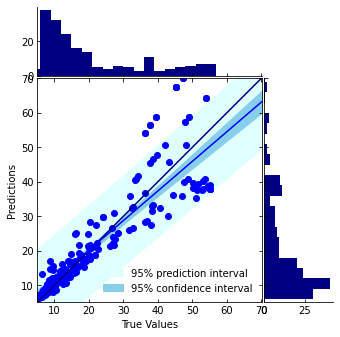

slope 0.89 int 2.35
r2 0.89
r  0.94
mse 25.76


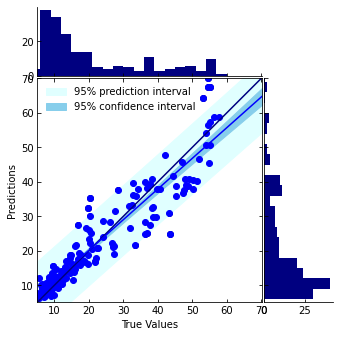

In [44]:
# Nem a metric vs predicted_next plotra vagyok kíváncsi (1)
plot_true_vs_pred_hist_conf(f3['CPU0User%'].values, pred_cpu)

# Hanem a next_metric vs predicted_next plotra (2)
plot_true_vs_pred_hist_conf(f3['CPU0User%Next'].values, pred_cpu)

In [45]:
# Egy gyors ellenörzés -> hogy vátozna, ha a 'k' (delta_vm) számát én állítanám be

# m'   = c0 + c1 · m · w/(w + k) + c2 · m · k/(w + k)

_cpu_usage = 90
_actual_vm = 2
_delta_vm = 10

_t1 = _cpu_usage * _actual_vm/(_actual_vm + _delta_vm)
_t2 = _cpu_usage * _delta_vm/(_actual_vm + _delta_vm)

_x = np.array([[_t1, _t2]])

print(_x.shape)
print(_x)

_feature_names_in_ = rr.feature_names_in_
print(_feature_names_in_)

_pred = rr.predict(_x)

print(_pred)

# Jó, a model azt mondja, hogy ha 1 darab VM-t hozzáadok akkor csökkenni fog a CPU Usage

(1, 2)
[[15. 75.]]
['cpu_term1' 'cpu_term2']
[58.61072306]


/home/ubuntu/notebook/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# LR modell megcsinálló

Minden metrikára megcsináljuk a tanítás és az LR modelleket elmenjük.

https://mljar.com/blog/save-load-scikit-learn-model

In [46]:
from sklearn.linear_model import LinearRegression

import pickle
import os

os.system('rm -rf ./lr')
os.system('mkdir ./lr')


def create_model_for_metric(columnname: str, short=False, binwidth=3.0):
    
    f1 = mf.copy()
    __next_name = columnname + 'Next'
    __prev_name = columnname + 'Prev'

    f1[__next_name] = f1[columnname].shift(-1)
    f1[__prev_name] = f1[columnname].shift(+1)
    
    f1 = f1.dropna()

    # Az lenne a korrekt ha kidobnám azokat ahol nem volt skálázás (delta_vm == 0)
    
    indexAge = f1[ (f1['delta_vm'] == 0) ].index
    f1.drop(indexAge , inplace=True)

    
    __metric_term1 = columnname + '_term1'
    __metric_term2 = columnname + '_term2'
    f1[__metric_term1] = f1[columnname] * f1['worker_number']/(f1['worker_number'] + f1['delta_vm'])
    f1[__metric_term2] = f1[columnname] * f1['delta_vm']/(f1['worker_number'] + f1['delta_vm'])
    
    __metric_term = f1[[__metric_term1, __metric_term2]]
    __metric_next = f1[__next_name]
    
    print(__metric_term.shape, __metric_next.shape)

    lr = LinearRegression(fit_intercept=True)

    rr = lr.fit(__metric_term, __metric_next)
    
    # A joblib lassú
    # _ = joblib.dump(lr, './lr/lr_' + columnname + '.joblib', compress=9)

    # A pickle gyors - save with pickle
    f = './lr/'
    filename = f + str(columnname) + '.pickle'
    pickle.dump(rr, open(filename, "wb"))
    
    # ------------------------------------

    __fit_score = rr.score(__metric_term, __metric_next)
    
    __fit_coef_ = rr.coef_
    
    __fit_intercept_ = rr.intercept_
    
    __pred_metric = rr.predict(__metric_term)
    
    if short == True:
        with np.printoptions(precision=2, suppress=True):

            print('score  = %.2f' % __fit_score)
            print('coef   =', __fit_coef_)
            print('intcpt = %.2f' % __fit_intercept_)
    
        print()
    
    # Uristen geci bazmeg, hogy én mekkora fasz vagyok
#    plot_true_vs_pred(f1[columnname].values, __pred_metric)
    # Ez itt a before vs pred_next
    # Nem pedig a next vs pred_next
    
#    plot_true_vs_pred(f1[__next_name].values, __pred_metric)
    # ugyan ez
    # plot_true_vs_pred(__metric_next, __pred_metric)

# A fenti kettő helyett van most ez az egy -> hogy egymás mellett legyenek
    if short == False:
        plot_true_vs_pred_two(f1[columnname].values, __pred_metric, f1[__next_name].values, __pred_metric)
    
    plot_true_vs_pred_hist_conf(f1[__next_name].values, __pred_metric, binwidth)


In [47]:
# Ezek itt a delta_metric_pred, delta_metric_true pred plottok

# Az lr álltal a metrika pred after scaling vs metrika true after scaling értékeket vetik össze.

# True vs Pred

# ------------

# Viszont a score, coef, intercpt értékek a modellből vannak számolva

# Viszont a slope, r2, r, mse viszot a becslés jóságát nézik (pred vs true)

(194, 2) (194,)
score  = 0.89
coef   = [0.87 0.58]
intcpt = 1.86

slope 0.89 int 2.35
r2 0.89
r  0.94
mse 25.76


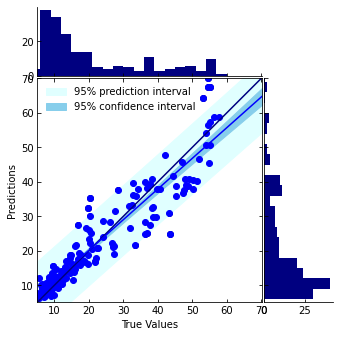

In [48]:
create_model_for_metric('CPU0User%', short=True)

(194, 2) (194,)


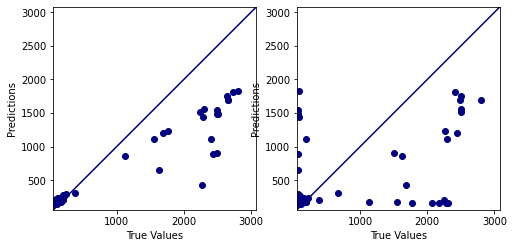

slope 0.33 int 211.73
r2 0.33
r  0.57
mse 268503.77


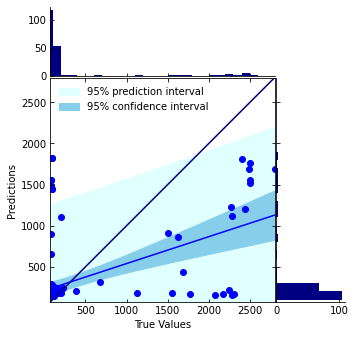

In [49]:
create_model_for_metric('response_time_p95', binwidth=100.0)

(194, 2) (194,)


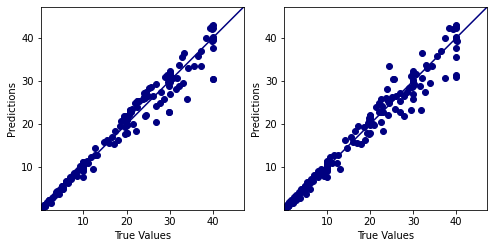

slope 0.97 int 0.46
r2 0.97
r  0.99
mse 4.73


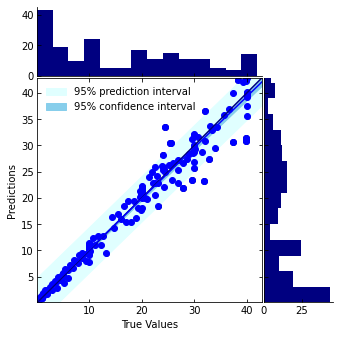

In [50]:
create_model_for_metric('request_rate')

(194, 2) (194,)


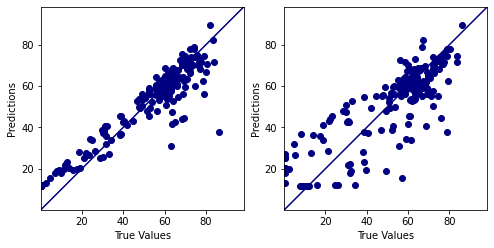

slope 0.69 int 16.38
r2 0.69
r  0.83
mse 154.14


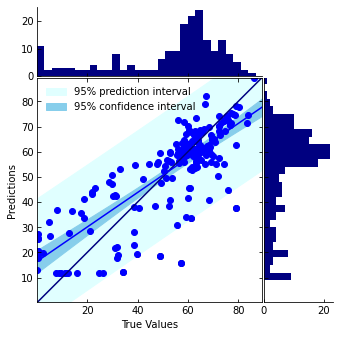

In [51]:
create_model_for_metric('CPU0Idle%')

(194, 2) (194,)


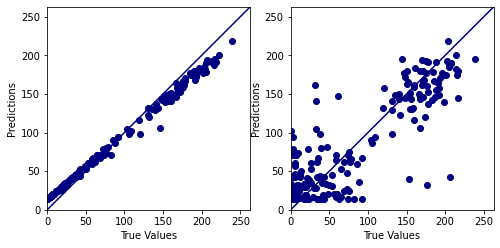

slope 0.73 int 22.57
r2 0.73
r  0.86
mse 1471.75


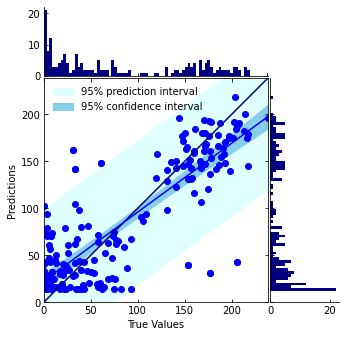

In [52]:
create_model_for_metric('[DSK:sda]RMerge')

(194, 2) (194,)


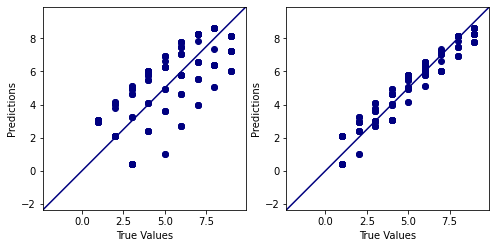

slope 0.91 int 0.47
r2 0.91
r  0.95
mse 0.58


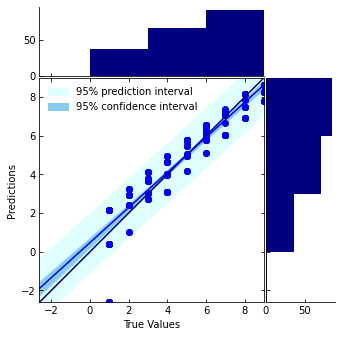

In [53]:
create_model_for_metric('worker_number')

# szerintem valami alapjaiban nem jó

# hogy lehet az, hogy ezt nem képes tökéletesen megmondani?

maaaaaa

In [54]:
from sklearn.linear_model import LinearRegression

def get_all(columnname: str, short=True):
    
    f1 = mf.copy()
    __next_name = columnname + 'Next'
    __prev_name = columnname + 'Prev'

    f1[__next_name] = f1[columnname].shift(-1)
    f1[__prev_name] = f1[columnname].shift(+1)
    
    f1 = f1.dropna()

    # Az lenne a korrekt ha kidobnám azokat ahol nem volt skálázás (delta_vm == 0)
    
    indexAge = f1[ (f1['delta_vm'] == 0) ].index
    f1.drop(indexAge , inplace=True)
    
    __metric_term1 = columnname + '_term1'
    __metric_term2 = columnname + '_term2'
    f1[__metric_term1] = f1[columnname] * f1['worker_number']/(f1['worker_number'] + f1['delta_vm'])
    f1[__metric_term2] = f1[columnname] * f1['delta_vm']/(f1['worker_number'] + f1['delta_vm'])
    
    __metric_term = f1[[__metric_term1, __metric_term2]]
    __metric_next = f1[__next_name]

    
    s = (__metric_term.shape, __metric_next.shape)
    

    lr = LinearRegression(fit_intercept=True)
    rr = lr.fit(__metric_term, __metric_next)
    rr.score(__metric_term, __metric_next)

    __fit_score = rr.score(__metric_term, __metric_next)
    __fit_coef_ = rr.coef_
    __fit_intercept_ = rr.intercept_

    __pred_metric = rr.predict(__metric_term)

    if short == False:
        with np.printoptions(precision=2, suppress=True):

            print('score  = %.2f' % __fit_score)
            print('coef   =', __fit_coef_)
            print('intcpt = %.2f' % __fit_intercept_)
    
        print()
    
#--------------------

    true = f1[__next_name].values
    pred = __pred_metric

    
    slope, intercept = np.polyfit(true, pred, 1)  # linear model adjustment
    y_model = np.polyval([slope, intercept], true)   # modeling...

    if short == False:
        print('slope {:.2f} int {:.2f}'.format(slope, intercept))

    true_mean = np.mean(true)
    pred_mean = np.mean(pred)
    n = true.size                     # number of samples
    m = 3                             # number of parameters
    dof = n - m                       # degrees of freedom
    t = stats.t.ppf(0.975, dof)       # Students statistic of interval confidence
    
    residual = true - pred
    
    std_error = (np.sum(residual**2) / dof)**.5   # Standard deviation of the error

    # calculating the r2
    # https://www.statisticshowto.com/probability-and-statistics/coefficient-of-determination-r-squared/
    # Pearson's correlation coefficient
    numerator = np.sum((true - true_mean)*(pred - pred_mean))
    denominator = ( np.sum((true - true_mean)**2) * np.sum((pred - pred_mean)**2) )**.5
    correlation_coef = numerator / denominator
    r2 = correlation_coef**2
    r  = np.sqrt(r2)

    n = true.size
    mse = 1/n * np.sum( (true - pred)**2 )
    
    if short == False:
    
        print('r2 {:.2f}'.format(r2))
        print('r  {:.2f}'.format(r))
        print('mse {:.2f}'.format(mse))

    return {'f1.shape': s,
            'score_or': __fit_score,
            'coef_or': __fit_coef_,
            'intercept_or': __fit_intercept_,
            'slope_tp': slope,
            'intercept_tp': intercept,
            'r2': r2,
            'r': r,
            'mse': mse}

In [55]:
get_all('CPU0Total%')

{'f1.shape': ((194, 2), (194,)),
 'score_or': 0.9000095691719929,
 'coef_or': array([0.87125765, 0.57701614]),
 'intercept_or': 3.239872776265514,
 'slope_tp': 0.9000095691719932,
 'intercept_tp': 3.799739454382645,
 'r2': 0.9000095691719927,
 'r': 0.9486883414335778,
 'mse': 77.15242046307432}

In [56]:
# Fentinek meg az alábbinak azonosnak kell lennie -> ez csak egy ellenőrzés

(194, 2) (194,)
score  = 0.90
coef   = [0.87 0.58]
intcpt = 3.24

slope 0.90 int 3.80
r2 0.90
r  0.95
mse 77.15


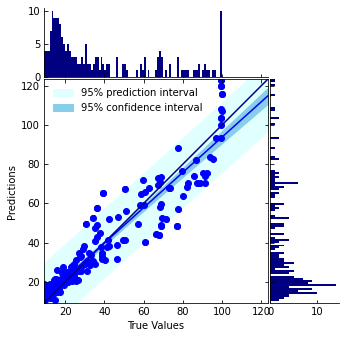

In [57]:
create_model_for_metric('CPU0Total%', short=True, binwidth=1.0)

In [58]:
print(colored('---------------------------------------', 'yellow'))
print(colored('---------------------------------------', 'red'))
print(colored('---------------------------------------', 'blue'))
print(colored('---------------------------------------', 'green'))
print(colored('---------------------------------------', 'magenta'))
print(colored('---------------------------------------', 'cyan'))

print(colored('--------------', color='red', on_color='on_grey'))

print(colored('--------------', color='red', on_color='on_grey', attrs=['bold']))

print(colored('--------------', color='red', on_color='on_grey', attrs=['bold', 'reverse']))

print(colored('--------------', color='red', on_color='on_grey', attrs=['bold', 'concealed']))

---------------------------------------
---------------------------------------
---------------------------------------
---------------------------------------
---------------------------------------
---------------------------------------
--------------
--------------
--------------
--------------


In [59]:
def get_terms_for_metric(columnname: str):
    
    f1 = mf.copy()
    __next_name = columnname + 'Next'
    __prev_name = columnname + 'Prev'

    f1[__next_name] = f1[columnname].shift(-1)
    f1[__prev_name] = f1[columnname].shift(+1)
    
    f1 = f1.dropna()

    # Az lenne a korrekt ha kidobnám azokat ahol nem volt skálázás (delta_vm == 0)
    
    indexAge = f1[ (f1['delta_vm'] == 0) ].index
    f1.drop(indexAge , inplace=True)
    
    __metric_term1 = columnname + '_term1'
    __metric_term2 = columnname + '_term2'
    f1[__metric_term1] = f1[columnname] * f1['worker_number']/(f1['worker_number'] + f1['delta_vm'])
    f1[__metric_term2] = f1[columnname] * f1['delta_vm']/(f1['worker_number'] + f1['delta_vm'])
    
    __metric_term = f1[[__metric_term1, __metric_term2]]
    __metric_next = f1[__next_name]
    
    return __metric_term, __metric_next, f1

In [60]:
from sklearn.linear_model import LinearRegression

## Statmodels vizsgálatok következnek

Amikor a lineáris regressziót a **sklearn.linear_model** helyett a **statsmodels.api** segítségével csinálom meg a lineris regressziót, annem meg van az az előnye, hogy statisztikai mutatókat (t-stat) és confidencia intervallumot tudok rá számolni.

---

Ettől függetlenül a program tényleges felhasználásában a **sklearn** segítségével dolgozok, de egyszer érdemes megvizsgálni azt is, hogy melyik regressziót tagok hatása milyen a modellre.

In [61]:
import statsmodels.api as sm

__metric_term, __metric_next, f1 = get_terms_for_metric('CPU0Total%')

_x = sm.add_constant(__metric_term)

print(type(_x), _x.shape)

model = sm.OLS(__metric_next, _x)

results = model.fit()

print('------------------------------------------------------------------------------')
print(results.summary())
print('------------------------------------------------------------------------------')

print(f'\ncoefficient of determination: \t\t{results.rsquared:.2f}')
print(f'\nadjusted coefficient of determination: \t{results.rsquared_adj:.2f}')
print(f'\nregression coefficients: {results.params}')    
# print(f'predicted response:\n{results.fittedvalues}')
# print(f'predicted response:\n{results.predict(_x.loc[l])}')
print('------------------------------------------------------------------------------')


<class 'pandas.core.frame.DataFrame'> (194, 3)
------------------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:         CPU0Total%Next   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 24 May 2023   Prob (F-statistic):           3.13e-96
Time:                        21:47:44   Log-Likelihood:                -696.82
No. Observations:                 194   AIC:                             1400.
Df Residuals:                     191   BIC:                             1409.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]

In [62]:
# Naiv
#  m′ = m · w/(w + k)

In [63]:
import statsmodels.api as sm

__metric_term, __metric_next, f1 = get_terms_for_metric('CPU0Total%')

print(__metric_term.columns)

# Naiv -> csak az első tagot veszem figyelembe
__metric_term = __metric_term.drop(['CPU0Total%_term2'], axis=1)

_x = sm.add_constant(__metric_term)

print(type(_x), _x.shape)

model = sm.OLS(__metric_next, _x)

results = model.fit()

print('------------------------------------------------------------------------------')
print(results.summary())
print('------------------------------------------------------------------------------')

print(f'\ncoefficient of determination: \t\t{results.rsquared:.2f}')
print(f'\nadjusted coefficient of determination: \t{results.rsquared_adj:.2f}')
print(f'\nregression coefficients: {results.params}')    
# print(f'predicted response:\n{results.fittedvalues}')
# print(f'predicted response:\n{results.predict(_x.loc[l])}')
print('------------------------------------------------------------------------------')


Index(['CPU0Total%_term1', 'CPU0Total%_term2'], dtype='object')
<class 'pandas.core.frame.DataFrame'> (194, 2)
------------------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:         CPU0Total%Next   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     390.6
Date:                Wed, 24 May 2023   Prob (F-statistic):           3.67e-48
Time:                        21:47:45   Log-Likelihood:                -812.50
No. Observations:                 194   AIC:                             1629.
Df Residuals:                     192   BIC:                             1636.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    

In [64]:
# Paraszt

# m' = b0 + b1*m + b2*w + b3*k

In [65]:
def get_terms_for_metric_paraszt(columnname: str):
    
    f1 = mf.copy()
    __next_name = columnname + 'Next'
    __prev_name = columnname + 'Prev'

    f1[__next_name] = f1[columnname].shift(-1)
    f1[__prev_name] = f1[columnname].shift(+1)
    
    f1 = f1.dropna()

    # Az lenne a korrekt ha kidobnám azokat ahol nem volt skálázás (delta_vm == 0)
    
    indexAge = f1[ (f1['delta_vm'] == 0) ].index
    f1.drop(indexAge , inplace=True)
    
    __metric_term1 = columnname + '_term1'
    __metric_term2 = columnname + '_term2'
    __metric_term3 = columnname + '_term3'
    
    f1[__metric_term1] = f1[columnname]
    f1[__metric_term2] = f1['worker_number']
    f1[__metric_term3] = f1['delta_vm']
    
    __metric_term = f1[[__metric_term1, __metric_term2, __metric_term3]]
    __metric_next = f1[__next_name]
    
    return __metric_term, __metric_next, f1

In [66]:
import statsmodels.api as sm

# Paraszt ->
__metric_term, __metric_next, f1 = get_terms_for_metric_paraszt('CPU0Total%')

_x = sm.add_constant(__metric_term)

print(type(_x), _x.shape)

model = sm.OLS(__metric_next, _x)

results = model.fit()

print('------------------------------------------------------------------------------')
print(results.summary())
print('------------------------------------------------------------------------------')

print(f'\ncoefficient of determination: \t\t{results.rsquared:.2f}')
print(f'\nadjusted coefficient of determination: \t{results.rsquared_adj:.2f}')
print(f'\nregression coefficients: {results.params}')    
# print(f'predicted response:\n{results.fittedvalues}')
# print(f'predicted response:\n{results.predict(_x.loc[l])}')
print('------------------------------------------------------------------------------')


<class 'pandas.core.frame.DataFrame'> (194, 4)
------------------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:         CPU0Total%Next   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     356.1
Date:                Wed, 24 May 2023   Prob (F-statistic):           1.03e-77
Time:                        21:47:46   Log-Likelihood:                -736.80
No. Observations:                 194   AIC:                             1482.
Df Residuals:                     190   BIC:                             1495.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]

In [67]:


# Egy dologra kiv vok ha most össze nézem a három megoldást

# (original, naiv, paraszt)

# r2
# original: 0.900
# naiv:     0.670
# pararszt: 0.849


# ---------------------------------------------------------


# Most jönne egy nagyon érdekes dolog

# Mögé tenni egy másik metrika értékét is



In [68]:
def get_terms_for_metric_ultra_paraszt(columnname: str, extra: str):
    
    f1 = mf.copy()
    __next_name = columnname + 'Next'
    __prev_name = columnname + 'Prev'

    f1[__next_name] = f1[columnname].shift(-1)
    f1[__prev_name] = f1[columnname].shift(+1)
    
    f1 = f1.dropna()

    # Az lenne a korrekt ha kidobnám azokat ahol nem volt skálázás (delta_vm == 0)
    
    indexAge = f1[ (f1['delta_vm'] == 0) ].index
    f1.drop(indexAge , inplace=True)
    
    __metric_term1 = columnname + '_term1'
    __metric_term2 = columnname + '_term2'
    __metric_term3 = columnname + '_term3'
    
    __metric_term4 = extra + 'term4'
    
    print('oooooooooooooooooooooooooooooooooooooooooo')
    print('      MODEL ULTRA PARASZ (AKA EXTRA)      ') 
    print('oooooooooooooooooooooooooooooooooooooooooo')
    print(__metric_term1)
    print(__metric_term2)
    print(__metric_term3)
    print(__metric_term4)
    print('oooooooooooooooooooooooooooooooooooooooooo')
    
    
    f1[__metric_term1] = f1[columnname]
    f1[__metric_term2] = f1['worker_number']
    f1[__metric_term3] = f1['delta_vm']
    f1[__metric_term4] = f1[extra]
    
    __metric_term = f1[[__metric_term1, __metric_term2, __metric_term3, __metric_term4]]
    __metric_next = f1[__next_name]
    
    return __metric_term, __metric_next, f1

In [69]:
import statsmodels.api as sm

# Ultra Paraszt ->
__metric_term, __metric_next, f1 = get_terms_for_metric_ultra_paraszt('CPU0Total%', 'CPU0User%')

_x = sm.add_constant(__metric_term)

print(type(_x), _x.shape)

model = sm.OLS(__metric_next, _x)

results = model.fit()

print('------------------------------------------------------------------------------')
print(results.summary())
print('------------------------------------------------------------------------------')

print(f'\ncoefficient of determination: \t\t{results.rsquared:.2f}')
print(f'\nadjusted coefficient of determination: \t{results.rsquared_adj:.2f}')
print(f'\nregression coefficients: {results.params}')    
print('------------------------------------------------------------------------------')


oooooooooooooooooooooooooooooooooooooooooo
      MODEL ULTRA PARASZ (AKA EXTRA)      
oooooooooooooooooooooooooooooooooooooooooo
CPU0Total%_term1
CPU0Total%_term2
CPU0Total%_term3
CPU0User%term4
oooooooooooooooooooooooooooooooooooooooooo
<class 'pandas.core.frame.DataFrame'> (194, 5)
------------------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:         CPU0Total%Next   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     266.2
Date:                Wed, 24 May 2023   Prob (F-statistic):           1.79e-76
Time:                        21:47:48   Log-Likelihood:                -736.63
No. Observations:                 194   AIC:                             1483.
Df Residuals:                     189   BIC:                             1500.
Df M

In [70]:


# Fentiből az látszik, hogy olyat adtam hozzá aminek hatása nem szignifikáns

# Nem is sikerült vele javítani a model álltal megmagyarázott hányadot (0.849)



<a id="experimental"></a>

# Ez itt most egy kisérleti szakasz

Ez a szakasz nem szükséges a tényleges műkdödéshez.

---

De kiváncsi vagyok a következő dologra.

**Lehet-e javítani a regressziós modelt?** másik metrika bevonásával?

Sajnos a lehetséges kombinációk száma nagyon sok (original, naiv, paraszt)

Ezért ez a szakasz itt igen hosszú lesz.

Ezért készítek néhány linket amellyel át lehet ugrani az egészet és onnan folytatni.

---

**Spoiler:** Annyi kiderült, hogy nem igazán érdemes most még baszakodni azzal, hogy extra változókat adok hozzá. Ha valamit érdemes megfonolni, hogy az **original** modell alapján érdemes dolgozni és a **naiv** illetve a **paraszt** modelleket el kell felejteni.

[Szakasz átugrása](#cont)

In [71]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [72]:
cn = mf.columns[4:-4]

In [73]:

# csak át akarom pörgetni nézni, hogy milyen eredményeket ad extra változókra a paraszt

def tmp(extra: str):

    # Ultra Paraszt ->
    __metric_term, __metric_next, f1 = get_terms_for_metric_ultra_paraszt('CPU0Total%', extra)

    _x = sm.add_constant(__metric_term)

    model = sm.OLS(__metric_next, _x)

    results = model.fit()

    print('------------------------------------------------------------------------------')
    print(results.summary())
    print('------------------------------------------------------------------------------')

    print(f'\ncoefficient of determination: \t\t{results.rsquared:.2f}')
    print(f'\nadjusted coefficient of determination: \t{results.rsquared_adj:.2f}')
    print(f'\nregression coefficients: {results.params}')    
    print('------------------------------------------------------------------------------')


In [74]:
interact(tmp, extra=cn);

interactive(children=(Dropdown(description='extra', options=('response_time', 'worker_number', 'request_rate',…

In [75]:


# Ugyan ez az original modell alapján (nincs közöttük interakció)



In [76]:
def get_terms_for_metric_with_extra(columnname: str, extra: str):
    
    f1 = mf.copy()
    __next_name = columnname + 'Next'
    __prev_name = columnname + 'Prev'

    f1[__next_name] = f1[columnname].shift(-1)
    f1[__prev_name] = f1[columnname].shift(+1)
    
    f1 = f1.dropna()

    # Az lenne a korrekt ha kidobnám azokat ahol nem volt skálázás (delta_vm == 0)
    
    indexAge = f1[ (f1['delta_vm'] == 0) ].index
    f1.drop(indexAge , inplace=True)
    
    __metric_term1 = columnname + '_term1'
    __metric_term2 = columnname + '_term2'
    __metric_term3 = extra + '_term1'
    __metric_term4 = extra + '_term2'
    f1[__metric_term1] = f1[columnname] * f1['worker_number']/(f1['worker_number'] + f1['delta_vm'])
    f1[__metric_term2] = f1[columnname] * f1['delta_vm']/(f1['worker_number'] + f1['delta_vm'])

    f1[__metric_term3] = f1[extra] * f1['worker_number']/(f1['worker_number'] + f1['delta_vm'])
    f1[__metric_term4] = f1[extra] * f1['delta_vm']/(f1['worker_number'] + f1['delta_vm'])
    
    __metric_term = f1[[__metric_term1, __metric_term2, __metric_term3, __metric_term4]]
    __metric_next = f1[__next_name]
    
    return __metric_term, __metric_next, f1

In [77]:

# csak át akarom pörgetni nézni, hogy milyen eredményeket ad extra változókra a paraszt

def tmp(extra: str):

    # Origina wit Extra ->
    __metric_term, __metric_next, f1 = get_terms_for_metric_with_extra('CPU0Total%', extra)

    _x = sm.add_constant(__metric_term)

    model = sm.OLS(__metric_next, _x)

    results = model.fit()

    print('------------------------------------------------------------------------------')
    print(results.summary())
    print('------------------------------------------------------------------------------')

    print(f'\ncoefficient of determination: \t\t{results.rsquared:.2f}')
    print(f'\nadjusted coefficient of determination: \t{results.rsquared_adj:.2f}')
    print(f'\nregression coefficients: {results.params}')    
    print('------------------------------------------------------------------------------')


In [78]:
interact(tmp, extra=cn);

interactive(children=(Dropdown(description='extra', options=('response_time', 'worker_number', 'request_rate',…

In [79]:


# Ugyanez az original modellel (de még az interakciót is hozzáadom)



In [80]:
def get_terms_for_metric_with_extra_and_interaction(columnname: str, extra: str):
    
    f1 = mf.copy()
    __next_name = columnname + 'Next'
    __prev_name = columnname + 'Prev'

    f1[__next_name] = f1[columnname].shift(-1)
    f1[__prev_name] = f1[columnname].shift(+1)
    
    f1 = f1.dropna()

    # Az lenne a korrekt ha kidobnám azokat ahol nem volt skálázás (delta_vm == 0)
    
    indexAge = f1[ (f1['delta_vm'] == 0) ].index
    f1.drop(indexAge , inplace=True)
    
    __metric_term1 = columnname + '_term1'
    __metric_term2 = columnname + '_term2'
    __metric_term3 = extra + '_term1'
    __metric_term4 = extra + '_term2'
    __metric_term5 = columnname + '_' + extra
    f1[__metric_term1] = f1[columnname] * f1['worker_number']/(f1['worker_number'] + f1['delta_vm'])
    f1[__metric_term2] = f1[columnname] * f1['delta_vm']/(f1['worker_number'] + f1['delta_vm'])

    f1[__metric_term3] = f1[extra] * f1['worker_number']/(f1['worker_number'] + f1['delta_vm'])
    f1[__metric_term4] = f1[extra] * f1['delta_vm']/(f1['worker_number'] + f1['delta_vm'])
    
    f1[__metric_term5] = f1[columnname] * f1[extra]
    
    __metric_term = f1[[__metric_term1, __metric_term2, __metric_term3, __metric_term4, __metric_term5]]
    __metric_next = f1[__next_name]
    
    return __metric_term, __metric_next, f1

In [81]:

# csak át akarom pörgetni nézni, hogy milyen eredményeket ad extra változókra a paraszt

def tmp(extra: str):

    # Origina wit Extra ->
    __metric_term, __metric_next, f1 = get_terms_for_metric_with_extra_and_interaction('CPU0Total%', extra)

    _x = sm.add_constant(__metric_term)

    model = sm.OLS(__metric_next, _x)

    results = model.fit()

    print('------------------------------------------------------------------------------')
    print(results.summary())
    print('------------------------------------------------------------------------------')

    print(f'\ncoefficient of determination: \t\t{results.rsquared:.2f}')
    print(f'\nadjusted coefficient of determination: \t{results.rsquared_adj:.2f}')
    print(f'\nregression coefficients: {results.params}')    
    print('------------------------------------------------------------------------------')


In [82]:
interact(tmp, extra=cn);

interactive(children=(Dropdown(description='extra', options=('response_time', 'worker_number', 'request_rate',…

In [83]:
__metric_term.columns

Index(['CPU0Total%_term1', 'CPU0Total%_term2', 'CPU0Total%_term3',
       'CPU0User%term4'],
      dtype='object')

slope 0.90 int 3.80
r2 0.90
r  0.95
mse 77.15


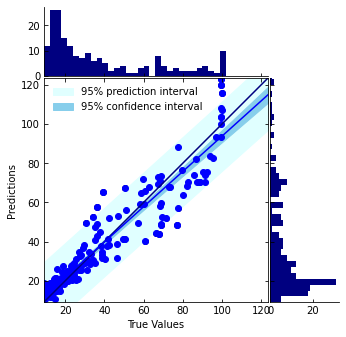

slope 0.67 int 12.52
r2 0.67
r  0.82
mse 254.27


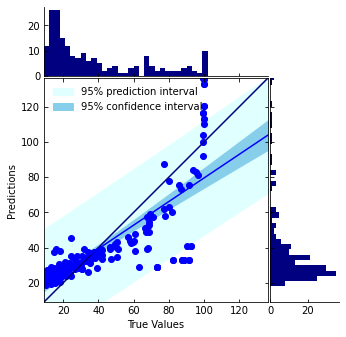

slope 0.85 int 5.74
r2 0.85
r  0.92
mse 116.52


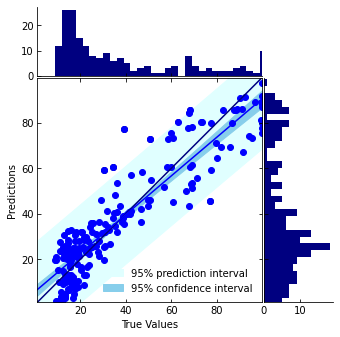

oooooooooooooooooooooooooooooooooooooooooo
      MODEL ULTRA PARASZ (AKA EXTRA)      
oooooooooooooooooooooooooooooooooooooooooo
CPU0Total%_term1
CPU0Total%_term2
CPU0Total%_term3
[TCPD]OutSegsterm4
oooooooooooooooooooooooooooooooooooooooooo
slope 0.86 int 5.32
r2 0.86
r  0.93
mse 108.05


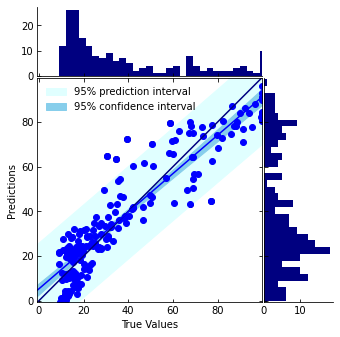

slope 0.91 int 3.35
r2 0.91
r  0.95
mse 68.00


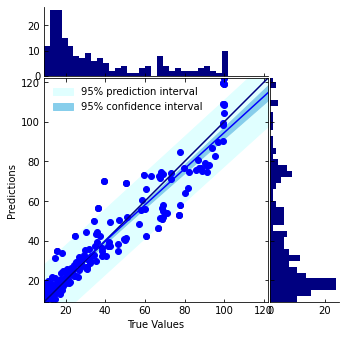

slope 0.92 int 3.03
r2 0.92
r  0.96
mse 61.58


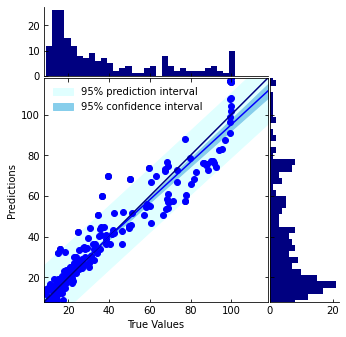

In [84]:

# A megfigyelés az, hogy bár az összes metrika - metrika kapcsolatot nem vizsgáltam végig

# De például a CPU0Total% esetében a [TCPD]OutSegs változóval és azok interakciójával kiegészítve
# valamennyit javult a CPU0Total% becslése (0.900 -> 0.920)

# Kivi vagyok, hogy ha ezt grafikusan ábrázolom akkor mi a helyzet


extra = '[TCPD]OutSegs'
metric = 'CPU0Total%'
metric_next = metric + 'Next'



# 0. (Original)
__metric_term, __metric_next, f1 = get_terms_for_metric(metric)

_x = sm.add_constant(__metric_term)
model = sm.OLS(__metric_next, _x)
results = model.fit()
pred = results.predict(_x)
pred = results.fittedvalues

# plot_true_vs_pred_two(f1[metric].values, pred, f1[metric_next].values, pred)
plot_true_vs_pred_hist_conf(f1[metric_next].values, pred, 3.0)

# 1. (Naiv)
__metric_term, __metric_next, f1 = get_terms_for_metric(metric)

# Naiv -> csak az első tagot veszem figyelembe
__metric_term = __metric_term.drop([metric + '_term2'], axis=1)

_x = sm.add_constant(__metric_term)
model = sm.OLS(__metric_next, _x)
results = model.fit()
pred = results.predict(_x)
pred = results.fittedvalues

# plot_true_vs_pred_two(f1[metric].values, pred, f1[metric_next].values, pred)
plot_true_vs_pred_hist_conf(f1[metric_next].values, pred, 3.0)

# 2.
__metric_term, __metric_next, f1 = get_terms_for_metric_paraszt(metric)

_x = sm.add_constant(__metric_term)
model = sm.OLS(__metric_next, _x)
results = model.fit()
pred = results.predict(_x)
pred = results.fittedvalues

# plot_true_vs_pred_two(f1[metric].values, pred, f1[metric_next].values, pred)
plot_true_vs_pred_hist_conf(f1[metric_next].values, pred, 3.0)

# 3.
__metric_term, __metric_next, f1 = get_terms_for_metric_ultra_paraszt(metric, extra)

_x = sm.add_constant(__metric_term)
model = sm.OLS(__metric_next, _x)
results = model.fit()
pred = results.predict(_x)
pred = results.fittedvalues

# plot_true_vs_pred_two(f1[metric].values, pred, f1[metric_next].values, pred)
plot_true_vs_pred_hist_conf(f1[metric_next].values, pred, 3.0)

# 4.
__metric_term, __metric_next, f1 = get_terms_for_metric_with_extra(metric, extra)

_x = sm.add_constant(__metric_term)
model = sm.OLS(__metric_next, _x)
results = model.fit()
pred = results.predict(_x)
pred = results.fittedvalues

# plot_true_vs_pred_two(f1[metric].values, pred, f1[metric_next].values, pred)
plot_true_vs_pred_hist_conf(f1[metric_next].values, pred, 3.0)


# 5.
__metric_term, __metric_next, f1 = get_terms_for_metric_with_extra_and_interaction(metric, extra)

_x = sm.add_constant(__metric_term)
model = sm.OLS(__metric_next, _x)
results = model.fit()
pred = results.predict(_x)
pred = results.fittedvalues

# plot_true_vs_pred_two(f1[metric].values, pred, f1[metric_next].values, pred)
plot_true_vs_pred_hist_conf(f1[metric_next].values, pred, 3.0)

In [85]:


# Megfigyelés

# Egy metrikát a CPU0Total% -ot végig néztem az original, a naiv, a paraszt, a paraszt extra, az original extra
# és az original extra with interaction segítségével.

# Igazából a többi metrikát is végig kéne néznem a többi metrikával kombinálva.. [ez elég sok]

# Ami most látszik, hogy :

# - a Naiv és a Paraszt valóban nem jó

#   Nem csak azért mert az illeszkedés kevésbé pontos, hanem jelentkezik a hetereoscendaszticitás jelensége is
#  (nem független a residuális hiba tag)


# Ez ráadásul csak egy típusu feladat, lehet, hogy más feladatnál más összefüggések jönnek ki


# Ugyanakkor a CPU0Total% egy olyan metrika amit már eleve jól becsült az LR


In [86]:

# Megpróbálom egy olyannál is ahol az original becslés nem volt annyira jó

# [DSK:sda]Reads
# [DSK:sda]RKBytes
# [DSK:sda]RMerge
# [DSK:sda]Request
# [DSK:sda]Wait
# [DSK:sda]WaitR
# [DSK:sda]Util   -> '[TCPD]OutSegs', 'CPU0Total%'
# [NUMA:0]Free
# [NUMA:0]Mapped  -> '[NUMA:0]Used', '[TCPD]OutSegs', 'CPU0Total%'
# [NUMA:0]Inactive

Original
slope 0.35 int 19983.08
r2 0.35
r  0.60
mse 12156263.49


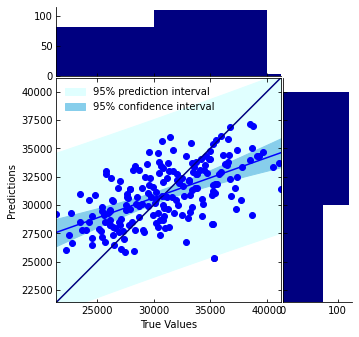

Original Extra with Interaction
slope 0.37 int 19660.83
r2 0.37
r  0.60
mse 11960230.79


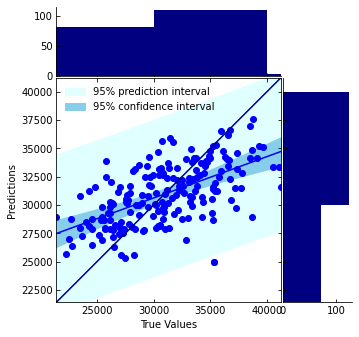

In [87]:

extra = 'CPU0Total%'
extra = '[TCPD]OutSegs'
extra = '[DSK:sda]Writes'
extra = '[NUMA:0]Used'


metric = '[NUMA:0]Inactive'
metric_next = metric + 'Next'

bins = 10000.0

# 0. (Original)
__metric_term, __metric_next, f1 = get_terms_for_metric(metric)

_x = sm.add_constant(__metric_term)
model = sm.OLS(__metric_next, _x)
results = model.fit()
pred = results.predict(_x)
pred = results.fittedvalues

print('Original')
# plot_true_vs_pred_two(f1[metric].values, pred, f1[metric_next].values, pred)
plot_true_vs_pred_hist_conf(f1[metric_next].values, pred, bins)


# 5.
__metric_term, __metric_next, f1 = get_terms_for_metric_with_extra_and_interaction(metric, extra)

_x = sm.add_constant(__metric_term)
model = sm.OLS(__metric_next, _x)
results = model.fit()
pred = results.predict(_x)
pred = results.fittedvalues

print('Original Extra with Interaction')
# plot_true_vs_pred_two(f1[metric].values, pred, f1[metric_next].values, pred)
plot_true_vs_pred_hist_conf(f1[metric_next].values, pred, bins)

In [88]:

# Megfigyelés

# Nem igazán segít ha hozzáadok a modellhez egy egy változót


In [89]:

# Tényleg csak kiviből, mi van ha az összeset hozzáadom



In [90]:
names = [
    'CPU0User%', 'CPU0Idle%', 'CPU0Total%', '[DSK:sda]Reads',
    '[DSK:sda]RMerge', '[DSK:sda]RKBytes', '[DSK:sda]WaitR', '[DSK:sda]Writes',
    '[DSK:sda]WMerge', '[DSK:sda]WKBytes', '[DSK:sda]WaitW',
    '[DSK:sda]Request', '[DSK:sda]Wait', '[DSK:sda]SvcTim', '[DSK:sda]Util',
    '[NUMA:0]Used', '[NUMA:0]Free', '[NUMA:0]Slab', '[NUMA:0]Mapped',
    '[NUMA:0]Anon', '[NUMA:0]Inactive', '[TCPD]InReceives', '[TCPD]InDelivers',
    '[TCPD]OutRequests', '[TCPD]InSegs', '[TCPD]OutSegs'
]

In [91]:
def get_terms_for_metric_with_all(columnname: str):
    
    f1 = mf.copy()
    __next_name = columnname + 'Next'
    __prev_name = columnname + 'Prev'

    f1[__next_name] = f1[columnname].shift(-1)
    f1[__prev_name] = f1[columnname].shift(+1)
    
    f1 = f1.dropna()

    # Az lenne a korrekt ha kidobnám azokat ahol nem volt skálázás (delta_vm == 0)
    
    indexAge = f1[ (f1['delta_vm'] == 0) ].index
    f1.drop(indexAge , inplace=True)
    
    __metric_term1 = columnname + '_term1'
    __metric_term2 = columnname + '_term2'
    f1[__metric_term1] = f1[columnname] * f1['worker_number']/(f1['worker_number'] + f1['delta_vm'])
    f1[__metric_term2] = f1[columnname] * f1['delta_vm']/(f1['worker_number'] + f1['delta_vm'])
    
    __terms = []
    
    __terms.append(__metric_term1)
    __terms.append(__metric_term2)
    
    for name in names:
        __metric_term_a = name + 'term1'
        __metric_term_b = name + 'term2'
        __metric_term_c = name + 'term3'
        
        f1[__metric_term_a] = f1[name] * f1['worker_number']/(f1['worker_number'] + f1['delta_vm'])
        f1[__metric_term_b] = f1[name] * f1['delta_vm']/(f1['worker_number'] + f1['delta_vm'])
        f1[__metric_term_c] = f1[columnname] * f1[name]
    
        __terms.append(__metric_term_a)
        __terms.append(__metric_term_b)
        __terms.append(__metric_term_c)
    
    # __metric_term = f1[[__metric_term1, __metric_term2, __metric_term3, __metric_term4, __metric_term5]]
    __metric_term = f1[__terms]
    __metric_next = f1[__next_name]
    
    return __metric_term, __metric_next, f1

In [92]:

def tmp(metric):

    metric = metric
    metric_next = metric + 'Next'

    bins = 10000.0

    # 0. (Original)
    __metric_term, __metric_next, f1 = get_terms_for_metric(metric)

    _x = sm.add_constant(__metric_term)
    model = sm.OLS(__metric_next, _x)
    results = model.fit()
    pred = results.predict(_x)
    pred = results.fittedvalues

    # print('Original')
    # plot_true_vs_pred_two(f1[metric].values, pred, f1[metric_next].values, pred)
    plot_true_vs_pred_hist_conf(f1[metric_next].values, pred, bins)


    # 6. (All)
    __metric_term, __metric_next, f1 = get_terms_for_metric_with_all(metric)

    _x = sm.add_constant(__metric_term)
    model = sm.OLS(__metric_next, _x)
    results = model.fit()
    pred = results.predict(_x)
    pred = results.fittedvalues

    # print('Original with All and interaction')
    # plot_true_vs_pred_two(f1[metric].values, pred, f1[metric_next].values, pred)
    plot_true_vs_pred_hist_conf(f1[metric_next].values, pred, bins)

In [93]:
interact(tmp, metric=cn);

interactive(children=(Dropdown(description='metric', options=('response_time', 'worker_number', 'request_rate'…

In [94]:


# A tanulság

# Ha mindegyiket mellé veszem akkor egyes változókat fel lehet hozni,
# Néhányat ami jó még jobbá tenni

# Kérdés persze, hogy mükdöik-e ez az életben, de az LR becslésük, hogy hova kerülnek
# egy felskálázás után az biztosan javul



In [95]:
# Amire egyébként még kivi lennék

# Csak megnézni egy olyan változót ahol nagy a javulás, hogy sm reg alapján mely változók okozzák a javulást

In [96]:

def vmp(metric):

    metric = metric
    metric_next = metric + 'Next'

    bins = 10000.0

    # 0. (Original)
    __metric_term, __metric_next, f1 = get_terms_for_metric(metric)

    _x = sm.add_constant(__metric_term)
    model = sm.OLS(__metric_next, _x)
    results = model.fit()
    pred = results.predict(_x)
    pred = results.fittedvalues

    # print('Original')
    # plot_true_vs_pred_two(f1[metric].values, pred, f1[metric_next].values, pred)
    plot_true_vs_pred_hist_conf(f1[metric_next].values, pred, bins)


    # 6. (All)
    __metric_term, __metric_next, f1 = get_terms_for_metric_with_all(metric)

    _x = sm.add_constant(__metric_term)
    model = sm.OLS(__metric_next, _x)
    results = model.fit()
    pred = results.predict(_x)
    pred = results.fittedvalues

    # print('Original with All and interaction')
    # plot_true_vs_pred_two(f1[metric].values, pred, f1[metric_next].values, pred)
    plot_true_vs_pred_hist_conf(f1[metric_next].values, pred, bins)
    
    print('------------------------------------------------------------------------------')
    print(results.summary())
    print('------------------------------------------------------------------------------')

    print(f'\ncoefficient of determination: \t\t{results.rsquared:.2f}')
    print(f'\nadjusted coefficient of determination: \t{results.rsquared_adj:.2f}')
    # print(f'\nregression coefficients: {results.params}')    
    print('------------------------------------------------------------------------------')

In [97]:
interact(vmp, metric=cn);

interactive(children=(Dropdown(description='metric', options=('response_time', 'worker_number', 'request_rate'…

In [98]:

# A következtetés az, hogy vannak változók amelyek esetében tényleg jól fel lehet javítani a becslést,
# de csak azokat szabad majd figyelembe venni az RT becslésénél amelyeknek az LR becslése elég jó.


In [99]:

def pmp(metric):
    
    returns = []

    metric = metric
    metric_next = metric + 'Next'

    # 0. (Original)
    __metric_term, __metric_next, f1 = get_terms_for_metric(metric)

    _x = sm.add_constant(__metric_term)
    model = sm.OLS(__metric_next, _x)
    results = model.fit()
    pred = results.predict(_x)
    pred = results.fittedvalues
    
    returns.append(results.rsquared_adj)


    # 6. (All)
    __metric_term, __metric_next, f1 = get_terms_for_metric_with_all(metric)

    _x = sm.add_constant(__metric_term)
    model = sm.OLS(__metric_next, _x)
    results = model.fit()
    pred = results.predict(_x)
    pred = results.fittedvalues
    
    returns.append(results.rsquared_adj)

    # print(f'\nadjusted coefficient of determination: \t{results.rsquared_adj:.2f}')
    
    return returns


In [100]:
results = []

for metric in cn:
    adj_r = pmp(metric)
    result = [metric]
    for _ in adj_r:
        result.append(_)
    results.append(result)

ad = pd.DataFrame(results, columns=['metric', 'original', 'full'])

ad['original'] = ad['original'].apply(lambda x: float("{:.2f}".format(x)))
ad['full'] = ad['full'].apply(lambda x: float("{:.2f}".format(x)))

/home/ubuntu/notebook/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/home/ubuntu/notebook/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [101]:
def color(val):
    if val > 0.9:
        color = 'green'
    elif val > 0.8:
        color = 'orange'
    else:
        color = 'yellow'
    return 'background-color: %s' % color

pd.options.display.float_format = "{:,.4f}".format
pd.set_option('display.precision', 2)
ad.style.applymap(color, subset=['original','full'])

In [102]:
pd.reset_option('^display.', silent=True)

In [103]:

# Tehát végül is itt látszik, hogy melyik metrikán sikerült javítani és mennyivel azáltal, hogy az összes
# többi metrikával becsültük


<a id="cont"></a>

## Kísérleti szakasz vége

Végeztem azzal amit meg akartam vizsgálni.

[Vissza a kísérleti szakasz elejére](#experimental)

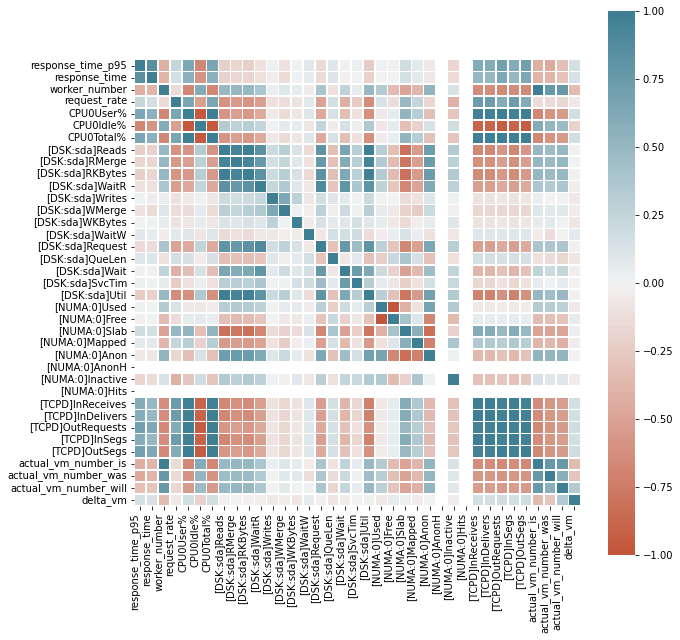

In [104]:
# Step 0 - Read the dataset, calculate column correlations and make a seaborn heatmap

corr = mf.corr()
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot=False, linewidths=0.5, ax=ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

In [105]:
input_variables = ['CPU0User%', '[DSK:sda]WKBytes', 'request_rate', 'response_time', 'worker_number']

In [106]:
def color(val):
    luma = 100 - ((val * 50) + 50)
    luma = int(luma)
    luma = str(luma) + '%'
    color = 'hsl(9, 100%, 64%)'
    color = 'hsl(9, 100%, ' + luma + ')'
    font = 'white'
    return 'background-color: %s; color: %s' % (color, font)

In [107]:
pd.options.display.float_format = "{:,.2f}".format
pd.set_option('display.precision', 5) # u.a.mint lent
pd.options.display.precision = 3      # u.a mint fönt
_ = mf[input_variables].corr()
_.style.applymap(color)
# display(_)

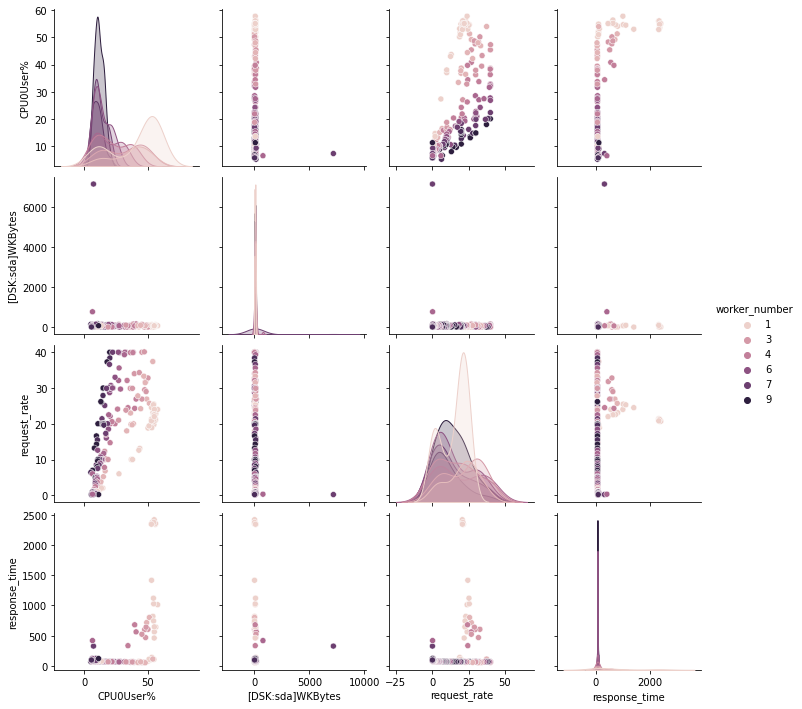

In [108]:
sns.pairplot(mf[input_variables], hue='worker_number')
plt.show()

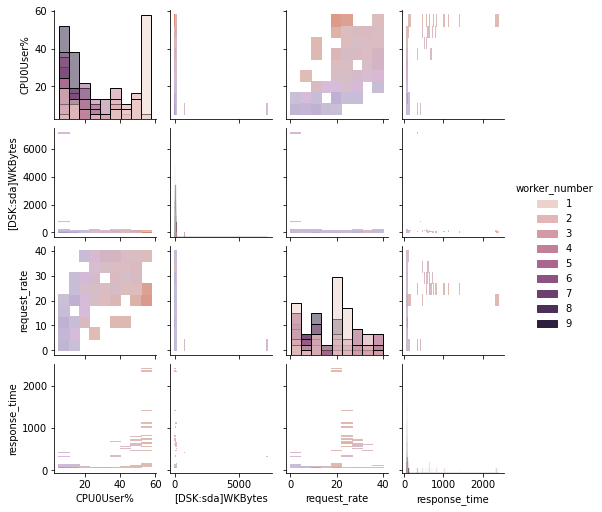

In [109]:
sns.pairplot(mf[input_variables], hue='worker_number', kind='hist', height=1.8)
plt.show()

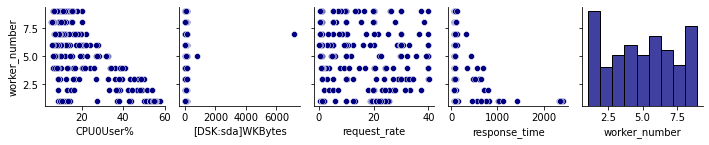

In [110]:
sns.pairplot(
    mf,
    x_vars=input_variables,
    y_vars=['worker_number'],
    height=2.0
); plt.show()

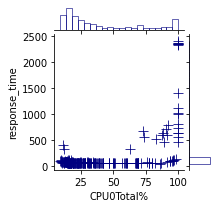

In [111]:
sns.jointplot(
    height=3.0,
    data=mf, x='CPU0Total%', y='response_time',
    marker="+", s=100, marginal_kws=dict(bins=20, fill=False),
); plt.show()

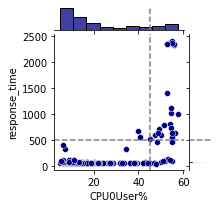

In [112]:
g = sns.JointGrid(data=mf, x='CPU0User%', y='response_time', height=3.0)
g.plot(sns.scatterplot, sns.histplot)
g.refline(x=45, y=500); plt.show()

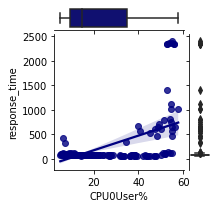

In [113]:
g = sns.JointGrid(data=mf, x='CPU0User%', y='response_time', height=3.0)
g.plot(sns.regplot, sns.boxplot); plt.show()

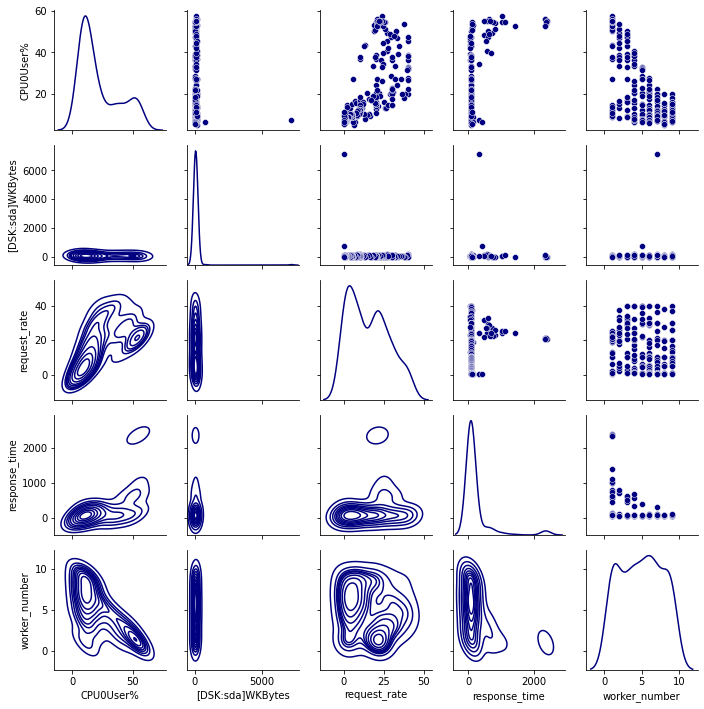

In [114]:
g = sns.PairGrid(mf[input_variables], diag_sharey=False, height=2.0)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot)

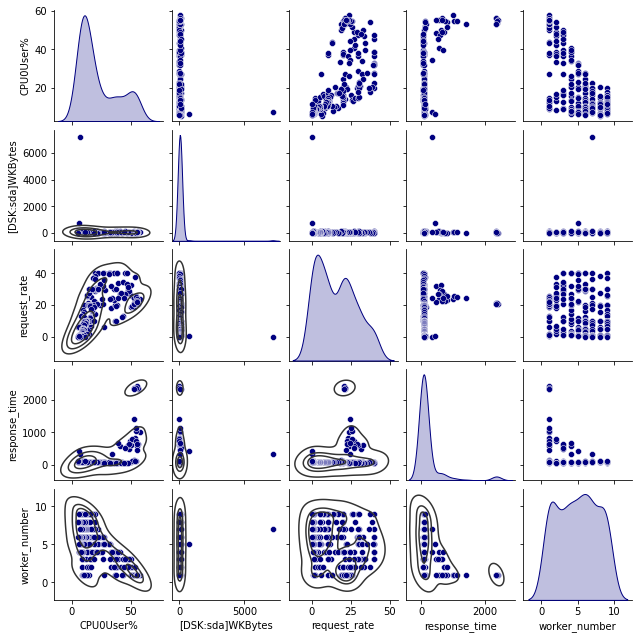

In [115]:
g = sns.pairplot(mf[input_variables], diag_kind='kde', height=1.8)
g.map_lower(sns.kdeplot, levels=4, color='.2'); plt.show()

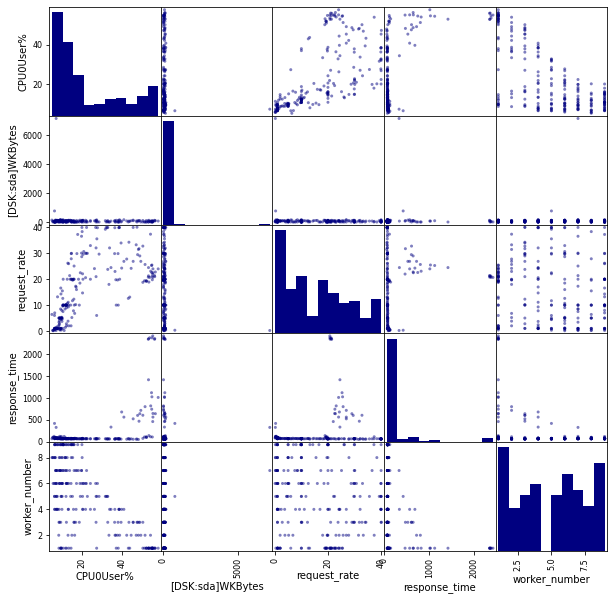

In [116]:
from pandas.plotting import scatter_matrix

scatter_matrix(mf[input_variables], figsize=(10,10))
plt.show()

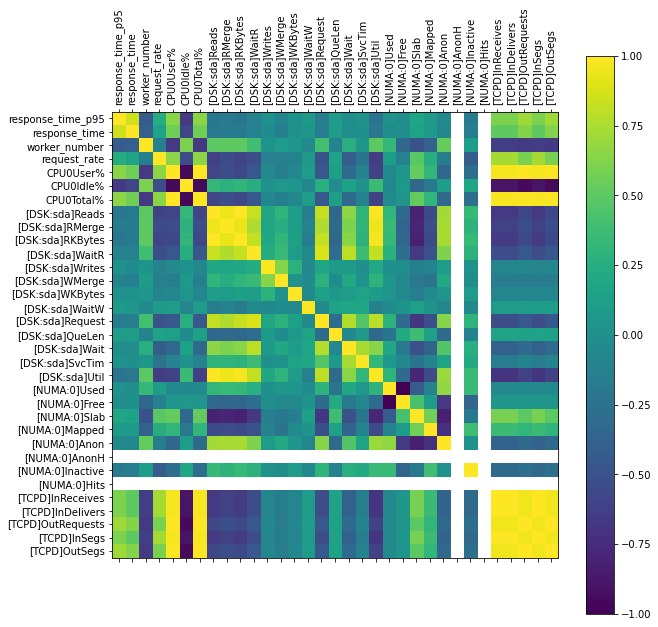

In [117]:
f = plt.figure(figsize=(10, 10))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=10, rotation=90)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
# plt.title('Correlation Matrix', fontsize=16);

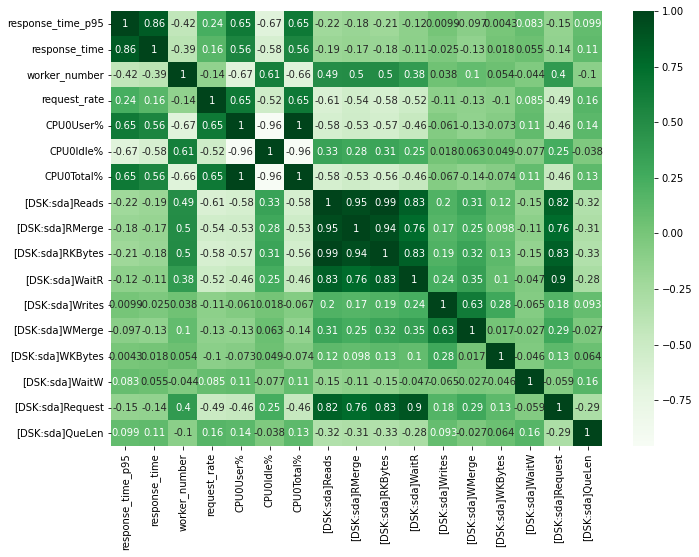

In [118]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(18, 18))
df= mf.iloc[: , [3,4,5,6,7,8,9,10,11,12,13,14,17]].copy()

df = mf.iloc[:, :20]
corr = df.corr()
plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap="Greens",annot=True)
plt.show()

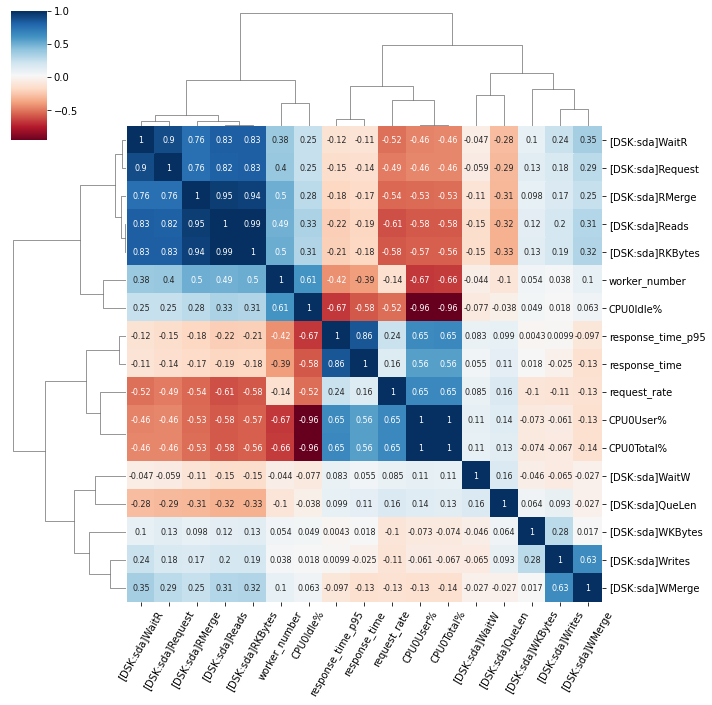

In [119]:
g = sns.clustermap(df.corr(), 
                   method = 'complete', 
                   cmap   = 'RdBu', 
                   annot  = True, 
                   annot_kws = {'size': 8})
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=60);

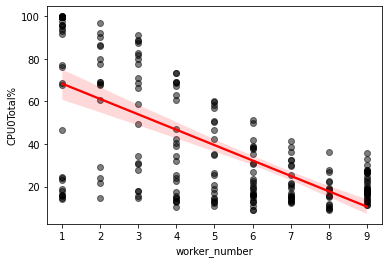

In [120]:
def scatter(x, y, color='black', alpha=0.5, lc='red', ci=95):
    sns.regplot(x=x,
                y=y,
                scatter_kws={
                    'color': color,
                    'alpha': alpha
                },
                line_kws={
                    'color': lc
                },
                ci=95)
    plt.show()

scatter(mf['worker_number'], mf['CPU0Total%'])

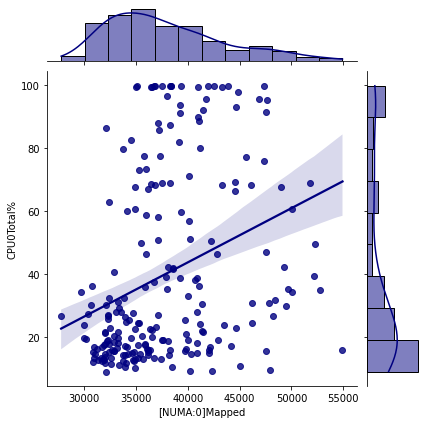

In [121]:
def join(x, y, data):
    sns.jointplot(x=x, y=y, data=data, kind='reg');

join('[NUMA:0]Mapped', 'CPU0Total%', mf)

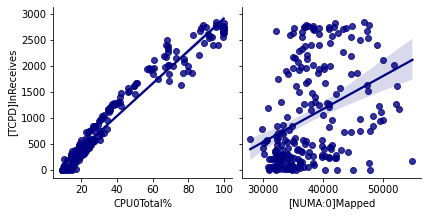

In [122]:
def pair(x_vars, y_vars, data):
    sns.pairplot(data, x_vars=x_vars, y_vars=y_vars,
             height=3, aspect=1.0, kind='reg');

pair(['CPU0Total%', '[NUMA:0]Mapped'], ['[TCPD]InReceives'], mf)

In [123]:

# Nézzük melyik metrikákkal correlál a worker_number és a delta_vm

# valójában a delta_m delta_vm érdekelne


In [124]:
an = mf.copy()

# Remove column name [...]
an = an.drop(['worker_give_metrics'], axis=1)
an = an.drop(['actual_vm_number_is', 'actual_vm_number_was', 'actual_vm_number_will'], axis=1)

# minden metrikára megcsinálni a nextet és kiszámolni a delta metrikát

column_names = an.columns

for columnname in column_names:

    __next_name = columnname + 'Nxt'

    an[__next_name] = an[columnname].shift(-1)

indexAge = an[ (an['delta_vm'] == 0) ].index
an.drop(indexAge , inplace=True)
an = an.dropna()


for columnname in column_names:
    
    if an[columnname].values.dtype != object:
        __next_name = columnname + 'Nxt'
        __delta_next_name = columnname + 'NextDelta'
        an[__delta_next_name] = an[__next_name] - an[columnname]

# an = an[an.columns.drop(list(an.filter(regex='Nxt')))]

# an.head()

In [125]:
tmp = an[['worker_number', 'delta_vm', 'CPU0Total%', 'CPU0Total%Nxt', 'CPU0Total%NextDelta']]

tmp.head()

worker_number  delta_vm  CPU0Total%  CPU0Total%Nxt  CPU0Total%NextDelta
0              1      2.00       15.90          15.50                -0.40
1              3     -2.00       15.50          15.70                 0.20
4              1      3.00       16.30          10.50                -5.80
5              4     -3.00       10.50          14.80                 4.30
8              1      1.00       24.10          14.50                -9.60

In [126]:
# Oké eddig jó

# delta_vm-re agregálni a delta_metrikát
an.groupby(['delta_vm'])['CPU0Total%NextDelta'].mean()

delta_vm
-3.00    11.23
-2.00    11.01
-1.00     6.86
1.00     -6.62
2.00    -10.04
3.00    -14.28
Name: CPU0Total%NextDelta, dtype: float64

In [127]:
# Oké eddig jó

# erre kéne csinálni valami ANOVA elemzés és F-statistikát

# https://www.pythonfordatascience.org/anova-python

# https://www.reneshbedre.com/blog/anova.html

import statsmodels.api as sm
from statsmodels.formula.api import ols

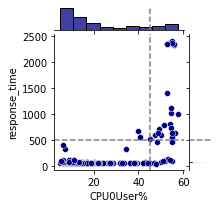

In [128]:
g = sns.JointGrid(data=mf, x='CPU0User%', y='response_time', height=3.0)
g.plot(sns.scatterplot, sns.histplot)
g.refline(x=45, y=500); plt.show()

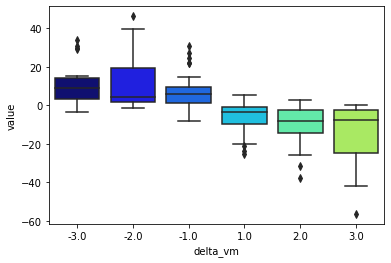

sum_sq     df     F  PR(>F)
C(delta_vm) 19,783.03   5.00 30.73    0.00
Residual    24,207.12 188.00   NaN     NaN

In [129]:
# Oké ez eddig jó

av = an[['delta_vm', 'response_timeNextDelta', 'CPU0Total%NextDelta', 'CPU0User%NextDelta', '[NUMA:0]SlabNextDelta', '[TCPD]OutSegsNextDelta']]

def anova(columnname: str):
    # Csak egy változó értdekel
    tmp = av[['delta_vm', columnname]]
    tmp_melt = pd.melt(tmp.reset_index(), id_vars=['delta_vm'], value_vars=[columnname])

    tmp_melt = pd.melt(tmp, id_vars=['delta_vm'], value_vars=[columnname])
    tmp_melt = tmp_melt.drop('variable', axis=1)
    
    ax = sns.boxplot(x="delta_vm", y="value", data=tmp_melt, width=0.8, whis=1.20)
    # ax = sns.swarmplot(x='delta_vm', y='value', data=tmp_melt, color='#000013', size=3)
    plt.show()

    model = ols('value ~ C(delta_vm)', data=tmp_melt).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)

    return anova_table

anova('CPU0Total%NextDelta')

In [130]:
# Interpretation

# The p value obtained from ANOVA analysis for delta_vm are statistically significant (p < 0.05).
# We conclude that type of delta_vm significantly affects the yield outcome (the change of the CPU usage)

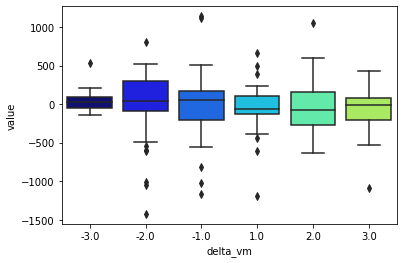

sum_sq     df    F  PR(>F)
C(delta_vm)    165,733.67   5.00 0.23    0.95
Residual    27,100,555.26 188.00  NaN     NaN

In [131]:
# Oké ez eddig jó

av = an[['delta_vm', 'response_timeNextDelta', 'CPU0Total%NextDelta', 'CPU0User%NextDelta', '[NUMA:0]SlabNextDelta', '[TCPD]OutSegsNextDelta']]

anova('[NUMA:0]SlabNextDelta')

In [132]:
# Interpretation

# Érdekes itt például nem szignifikáns az eltérés.

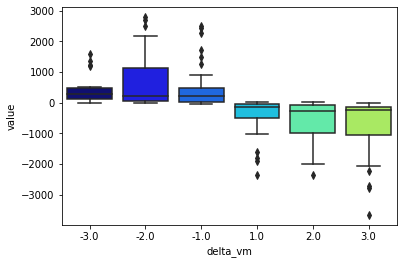

sum_sq     df     F  PR(>F)
C(delta_vm)  65,234,665.33   5.00 22.64    0.00
Residual    108,331,782.69 188.00   NaN     NaN

In [133]:
# Oké ez eddig jó

av = an[['delta_vm', 'response_timeNextDelta', 'CPU0Total%NextDelta', 'CPU0User%NextDelta', '[NUMA:0]SlabNextDelta', '[TCPD]OutSegsNextDelta']]

anova('[TCPD]OutSegsNextDelta')

In [134]:
# Interpretation

# The p value obtained from ANOVA analysis for delta_vm are statistically significant (p < 0.05).
# We conclude that type of delta_vm significantly affects the yield outcome (the change of the TCP Sent out packet)

In [135]:
# Arra, hogy melyek azok a metrikák amelyekben a vm szám változás egyáltalán előidéz valamit

# kell egy dataframe amiben csak a NextDelta változók és a delta_vm van benne

aa = an[an.columns.difference([i for i in an.columns if 'NextDelta' not in i])]
aa = an[an.columns.difference([i for i in an.columns if ('NextDelta' not in i) and ('delta_vm' not in i)])]
aa = aa.drop('worker_numberNextDelta', axis=1)

aa.columns


Index(['CPU0Idle%NextDelta', 'CPU0Total%NextDelta', 'CPU0User%NextDelta',
       '[DSK:sda]QueLenNextDelta', '[DSK:sda]RKBytesNextDelta',
       '[DSK:sda]RMergeNextDelta', '[DSK:sda]ReadsNextDelta',
       '[DSK:sda]RequestNextDelta', '[DSK:sda]SvcTimNextDelta',
       '[DSK:sda]UtilNextDelta', '[DSK:sda]WKBytesNextDelta',
       '[DSK:sda]WMergeNextDelta', '[DSK:sda]WaitNextDelta',
       '[DSK:sda]WaitRNextDelta', '[DSK:sda]WaitWNextDelta',
       '[DSK:sda]WritesNextDelta', '[NUMA:0]AnonHNextDelta',
       '[NUMA:0]AnonNextDelta', '[NUMA:0]FreeNextDelta',
       '[NUMA:0]HitsNextDelta', '[NUMA:0]InactiveNextDelta',
       '[NUMA:0]MappedNextDelta', '[NUMA:0]SlabNextDelta',
       '[NUMA:0]UsedNextDelta', '[TCPD]InDeliversNextDelta',
       '[TCPD]InReceivesNextDelta', '[TCPD]InSegsNextDelta',
       '[TCPD]OutRequestsNextDelta', '[TCPD]OutSegsNextDelta', 'delta_vm',
       'delta_vmNextDelta', 'delta_vmNxt', 'request_rateNextDelta',
       'response_timeNextDelta', 'response_time_p

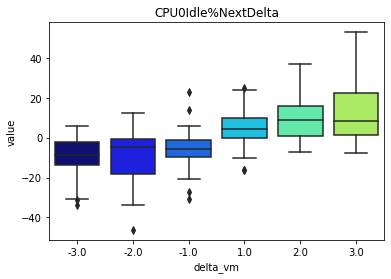

CPU0Idle%NextDelta sig = 0.00


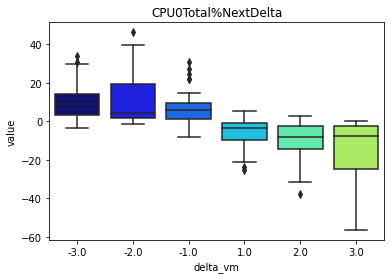

CPU0Total%NextDelta sig = 0.00


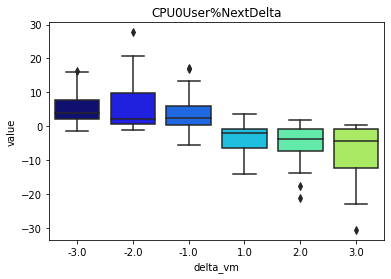

CPU0User%NextDelta sig = 0.00
[DSK:sda]QueLenNextDelta sig = 0.24
[DSK:sda]RKBytesNextDelta sig = 0.15
[DSK:sda]RMergeNextDelta sig = 0.40
[DSK:sda]ReadsNextDelta sig = 0.40


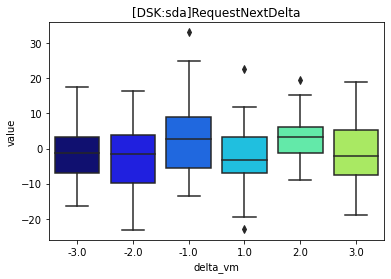

[DSK:sda]RequestNextDelta sig = 0.05
[DSK:sda]SvcTimNextDelta sig = 0.51


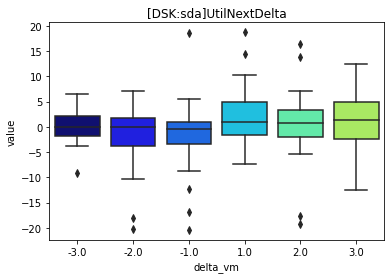

[DSK:sda]UtilNextDelta sig = 0.09
[DSK:sda]WKBytesNextDelta sig = 0.56
[DSK:sda]WMergeNextDelta sig = 0.86
[DSK:sda]WaitNextDelta sig = 0.15
[DSK:sda]WaitRNextDelta sig = 0.10
[DSK:sda]WaitWNextDelta sig = 0.60
[DSK:sda]WritesNextDelta sig = 0.67


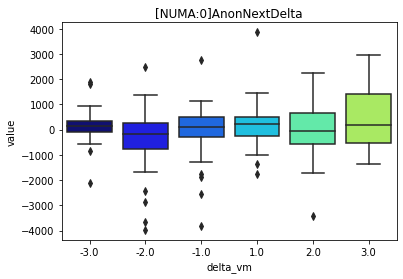

[NUMA:0]AnonNextDelta sig = 0.08
[NUMA:0]FreeNextDelta sig = 0.71
[NUMA:0]InactiveNextDelta sig = 0.47
[NUMA:0]MappedNextDelta sig = 0.60
[NUMA:0]SlabNextDelta sig = 0.95
[NUMA:0]UsedNextDelta sig = 0.71


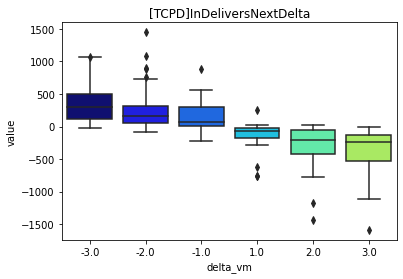

[TCPD]InDeliversNextDelta sig = 0.00


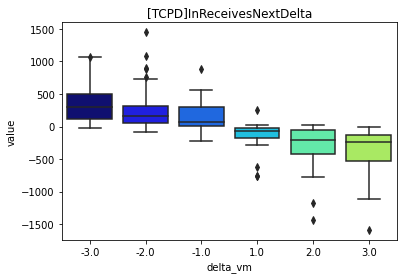

[TCPD]InReceivesNextDelta sig = 0.00


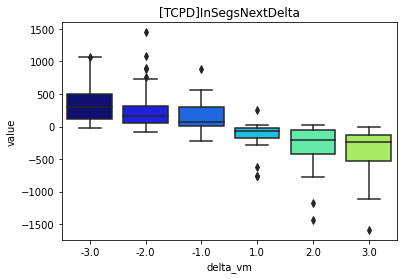

[TCPD]InSegsNextDelta sig = 0.00


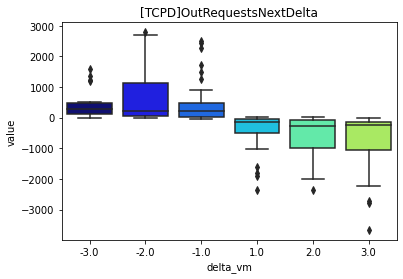

[TCPD]OutRequestsNextDelta sig = 0.00


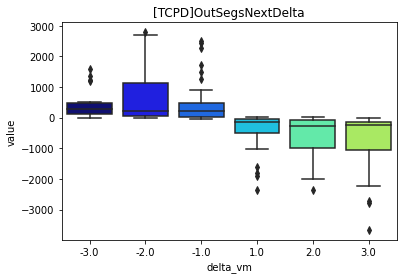

[TCPD]OutSegsNextDelta sig = 0.00


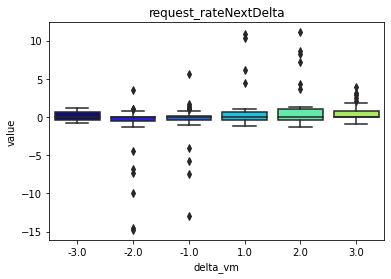

request_rateNextDelta sig = 0.00


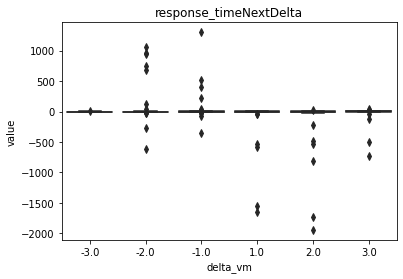

response_timeNextDelta sig = 0.00
response_time_p95NextDelta sig = 0.40


In [136]:
# Oké eddig jó

# Ennél mélyebben szerintem nem kell foglalkozni azzal, hogy delta_vm milyen delta_vm hatást ért el az egyes
# metrikákban.

# Esetleg amire még kíváncs lennék, hogy ha szisztematikusan kiszámolnám az F-statisztikát minden delta_metrikára
# akkor melyek lennének szignifikánsak

# Oké ez eddig jó

sig_s = []

for i in aa.columns:
    if(aa[i].describe()['std'] > 0):
        if 'delta_vm' not in i:
            # Csak egy változó értdekel
            tmp = aa[['delta_vm', i]]
            tmp_melt = pd.melt(tmp, id_vars=['delta_vm'], value_vars=[i])
            tmp_melt = tmp_melt.drop('variable', axis=1)

            model = ols('value ~ C(delta_vm)', data=tmp_melt).fit()
            anova_table = sm.stats.anova_lm(model, typ=2)
            sig = anova_table['PR(>F)'][0]

            if sig < 0.1:
                ax = sns.boxplot(x="delta_vm", y="value", data=tmp_melt)
                ax.set_title(i)
                plt.show()

            sig_s.append([i, sig])
            print(f'{i} sig = {sig:.2f}')

sig = pd.DataFrame(sig_s)
sig.columns = ['Metric', 'sig']

sig['sig'] = sig['sig'].apply(lambda x: float("{:.2f}".format(x)))

In [137]:
def color(val):
    if val <= 0.1:
        color = 'green'
    elif val > 0.1:
        color = 'yellow'
    else:
        color = 'white'
    return 'background-color: %s' % color

sig.style.applymap(color, subset=['sig'])

In [138]:

# Félre értés ne essék, ez nem azt jelenti, hogy a nem sig metrika nem lehet hatással az RT-re,

# Azt viszont biztosan jelenti, hogy a vm szám változás nincs hatással a metrikára.


In [139]:
# Oké eddig jó

# Most már látom, hogy melyek azok a metrikák amelyek signifiánsan változnak a delta_vm hatására a feladatban



In [140]:
# Oké eddig jó

# lehet egyszerre több változóra is megcsinálni az aggregációt
an.groupby(['delta_vm'])[['CPU0Total%NextDelta', 'CPU0User%NextDelta']].mean()

CPU0Total%NextDelta  CPU0User%NextDelta
delta_vm                                         
-3.00                   11.23                5.92
-2.00                   11.01                6.06
-1.00                    6.86                3.93
1.00                    -6.62               -3.75
2.00                   -10.04               -5.28
3.00                   -14.28               -7.77

In [141]:
# Oké eddig jó

# lehet egyszerre több változóra is megcsinálni az aggregációt
_ = [x for x in aa.columns if 'TCP' in x]
an.groupby(['delta_vm'])[_].mean()

# Ez például érdekes -> lehet, hogy jobb lenne az InDelivers változót használnom az OutSegs helyett+

[TCPD]InDeliversNextDelta  [TCPD]InReceivesNextDelta  \
delta_vm                                                         
-3.00                        360.49                     360.49   
-2.00                        266.53                     266.53   
-1.00                        168.96                     168.96   
1.00                        -133.11                    -133.11   
2.00                        -289.79                    -289.79   
3.00                        -384.94                    -384.94   

          [TCPD]InSegsNextDelta  [TCPD]OutRequestsNextDelta  \
delta_vm                                                      
-3.00                    360.49                      455.87   
-2.00                    266.58                      660.61   
-1.00                    168.96                      466.04   
1.00                    -133.07                     -426.21   
2.00                    -289.88                     -572.22   
3.00                    -384.91                     -791.24   

          [TCPD]OutSegsNextDelta  
delta_vm                          
-3.00                     455.86  
-2.00                     660.66  
-1.00                     466.04  
1.00                     -426.16  
2.00                     -572.33  
3.00                     -791.21

In [142]:
# Oké eddig jó

# lehet egyszerre több változóra is megcsinálni az aggregációt
l = an.columns[73:80]
an.groupby(['delta_vm'])[l].mean()

response_timeNextDelta  worker_numberNextDelta  \
delta_vm                                                   
-3.00                      -2.04                   -3.00   
-2.00                      84.65                   -2.00   
-1.00                      51.09                   -1.00   
1.00                     -137.45                    1.00   
2.00                     -167.62                    2.00   
3.00                      -45.20                    3.00   

          request_rateNextDelta  CPU0User%NextDelta  CPU0Idle%NextDelta  \
delta_vm                                                                  
-3.00                      0.10                5.92              -10.91   
-2.00                     -1.36                6.06               -9.62   
-1.00                     -0.54                3.93               -6.04   
1.00                       0.88               -3.75                5.01   
2.00                       1.26               -5.28                9.91   
3.00                       0.66               -7.77               12.76   

          CPU0Total%NextDelta  [DSK:sda]ReadsNextDelta  
delta_vm                                                
-3.00                   11.23                    -6.29  
-2.00                   11.01                    -7.53  
-1.00                    6.86                    -2.30  
1.00                    -6.62                    13.07  
2.00                   -10.04                     1.34  
3.00                   -14.28                     5.03

In [143]:
# Oké eddig jó

# lehet egyszerre több változóra is megcsinálni az aggregációt csak a deltákra és elforgatva
l = an.columns[73:105]
an.groupby(['delta_vm'])[l].mean().round(2).T

delta_vm                       -3.00     -2.00   -1.00   1.00    2.00    3.00 
response_timeNextDelta         -2.04     84.65   51.09 -137.45 -167.62  -45.20
worker_numberNextDelta         -3.00     -2.00   -1.00    1.00    2.00    3.00
request_rateNextDelta           0.10     -1.36   -0.54    0.88    1.26    0.66
CPU0User%NextDelta              5.92      6.06    3.93   -3.75   -5.28   -7.78
CPU0Idle%NextDelta            -10.91     -9.62   -6.04    5.01    9.91   12.76
CPU0Total%NextDelta            11.23     11.01    6.86   -6.62  -10.04  -14.28
[DSK:sda]ReadsNextDelta        -6.29     -7.53   -2.30   13.07    1.34    5.03
[DSK:sda]RMergeNextDelta        1.35     -6.80   -3.14    5.50   -5.51   12.43
[DSK:sda]RKBytesNextDelta    -406.26   -252.21  -35.21  609.01   20.39  130.99
[DSK:sda]WaitRNextDelta        -0.06     -0.11    0.06   -0.11    0.19   -0.03
[DSK:sda]WritesNextDelta       -0.92     -1.00    1.87   -2.84    2.12    3.18
[DSK:sda]WMergeNextDelta       -0.01     -0.04   -0.02    0.06    0.24   -0.08
[DSK:sda]WKBytesNextDelta      -3.97     -4.98  182.92  -12.49   10.33   13.75
[DSK:sda]WaitWNextDelta        -0.07     -0.03    0.07   -0.08   -0.04    0.10
[DSK:sda]RequestNextDelta      -0.84     -2.03    2.94   -2.34    2.61   -0.77
[DSK:sda]QueLenNextDelta       -0.01      0.01   -0.01    0.00    0.00    0.03
[DSK:sda]WaitNextDelta         -0.07     -0.08    0.04   -0.16    0.15    0.04
[DSK:sda]SvcTimNextDelta       -0.08     -0.01   -0.00   -0.17    0.13    0.04
[DSK:sda]UtilNextDelta          0.16     -1.50   -1.38    1.95    0.19    1.47
[NUMA:0]UsedNextDelta      -1,366.84 -1,062.19 -113.32 -371.96  370.21  918.77
[NUMA:0]FreeNextDelta       1,366.84  1,062.19  113.32  371.96 -370.21 -918.77
[NUMA:0]SlabNextDelta          45.47    -14.54   -5.17  -51.19    2.15  -54.79
[NUMA:0]MappedNextDelta    -1,245.80   -154.29 -329.92 -255.99  -94.92  689.87
[NUMA:0]AnonNextDelta         146.29   -361.90  -71.66  227.06   78.85  440.97
[NUMA:0]AnonHNextDelta          0.00      0.00    0.00    0.00    0.00    0.00
[NUMA:0]InactiveNextDelta  -1,275.69   -464.30 -146.39  611.35 -179.44  846.61
[NUMA:0]HitsNextDelta           0.00      0.00    0.00    0.00    0.00    0.00
[TCPD]InReceivesNextDelta     360.49    266.53  168.96 -133.11 -289.79 -384.94
[TCPD]InDeliversNextDelta     360.49    266.53  168.96 -133.11 -289.79 -384.94
[TCPD]OutRequestsNextDelta    455.87    660.61  466.04 -426.21 -572.22 -791.24
[TCPD]InSegsNextDelta         360.49    266.58  168.96 -133.07 -289.88 -384.91
[TCPD]OutSegsNextDelta        455.86    660.66  466.04 -426.16 -572.33 -791.21

In [144]:
# Oké eddig jó

# viszont úgy vettem észre, hogy csak az alábbi metrikák követik a szigorú linearitást

# CPU0Total%NextDelta

# DSK-ból egyik sem (!)

# [NUMA:0]SlabNextDelta

# TCP-ből bármelyik de inkább az IN

In [145]:
# Oké eddig jó

# lehet egyszerre több változó alapján is aggregálni
an.groupby(['delta_vm', 'worker_number'])['CPU0Total%NextDelta'].mean()

delta_vm  worker_number
-3.00     4                 7.05
          5                21.75
          6                24.75
          7                 7.97
          8                 3.65
          9                 2.88
-2.00     3                23.71
          4                20.42
          5                14.88
          6                 0.70
          7                 3.63
          8                 2.57
          9                 3.57
-1.00     2                17.99
          3                 6.87
          4                 8.60
          5                 7.27
          6                 4.16
          7                 2.38
          8                 2.70
          9                -1.01
1.00      1               -15.48
          2               -21.10
          3               -15.77
          4                -6.53
          5                -4.53
          6                 0.78
          7                -0.80
          8                -0.99
2.00      1        

In [146]:
# Oké eddig jó

# Ilyet is lehet (avg, min, max, std)
aa = an.groupby(['delta_vm'])[['CPU0Total%NextDelta', 'CPU0User%NextDelta']].mean()
bb = an.groupby(['delta_vm'])[['CPU0Total%NextDelta', 'CPU0User%NextDelta']].min()
cc = an.groupby(['delta_vm'])[['CPU0Total%NextDelta', 'CPU0User%NextDelta']].max()
dd = an.groupby(['delta_vm'])[['CPU0Total%NextDelta', 'CPU0User%NextDelta']].std()
aa.columns = ['CPU0Total%mean', 'CPU0User%mean']
bb.columns = ['CPU0Total%min', 'CPU0User%min']
cc.columns = ['CPU0Total%max', 'CPU0User%max']
dd.columns = ['CPU0Total%std', 'CPU0User%std']

ff = pd.concat([aa, bb, cc, dd], axis=1)

ff.head()

CPU0Total%mean  CPU0User%mean  CPU0Total%min  CPU0User%min  \
delta_vm                                                               
-3.00              11.23           5.92          -3.30         -1.30   
-2.00              11.01           6.06          -1.20         -1.20   
-1.00               6.86           3.93          -8.30         -5.60   
1.00               -6.62          -3.75         -25.00        -14.10   
2.00              -10.04          -5.28         -37.90        -21.10   

          CPU0Total%max  CPU0User%max  CPU0Total%std  CPU0User%std  
delta_vm                                                            
-3.00             34.10         16.30          11.86          5.93  
-2.00             46.20         27.70          12.80          7.33  
-1.00             30.90         17.20           8.69          5.20  
1.00               5.40          3.60           8.26          4.73  
2.00               2.70          2.00          10.05          5.51

In [147]:
an.groupby(['delta_vm']).agg({
    'CPU0Total%NextDelta': ['mean', 'min', 'max', 'std'],
    'CPU0User%NextDelta': ['mean', 'min', 'max', 'std']
})

CPU0Total%NextDelta                    CPU0User%NextDelta         \
                        mean    min   max   std               mean    min   
delta_vm                                                                    
-3.00                  11.23  -3.30 34.10 11.86               5.92  -1.30   
-2.00                  11.01  -1.20 46.20 12.80               6.06  -1.20   
-1.00                   6.86  -8.30 30.90  8.69               3.93  -5.60   
1.00                   -6.62 -25.00  5.40  8.26              -3.75 -14.10   
2.00                  -10.04 -37.90  2.70 10.05              -5.28 -21.10   
3.00                  -14.28 -56.40  0.20 15.76              -7.77 -30.50   

                     
           max  std  
delta_vm             
-3.00    16.30 5.93  
-2.00    27.70 7.33  
-1.00    17.20 5.20  
1.00      3.60 4.73  
2.00      2.00 5.51  
3.00      0.50 8.76

In [148]:
#

#

# Itt tartok éppen

# Azon dolgozom, hogy a delta_metrika értékeket (delta_vm) fényében össze tudjam hasonlítani az egyes testek között

# Az egyes testek az egyes TestXX mappákban vannak

# Ez a 'Scaler/Train_Log_Anova.ipynb' notebookban megcsináltam

#

#

# Ez azt jelenti, hogy ammi innentől jön az már nem kell?

Ez a rész itt arra jó, hogy menézzem vele hogyan sikerült a linreg egy adott metrikára.

Erre elsősorban azért van szükség mert szretném kiválasztani a metrikáknak azt a halmazát amelyek alapján majda a neruális hálóban a válaszidőt becsülöm.

Ha egy metrika linreg becsése szar (rossz, nem elég jó) akkor hiba, vagy kár lenne bevenni a neurális hálóba mert nem fogom tudni pontosan becsülni magát a metrikát a fel-, le-skálázásnál.

In [149]:
def cc(columnname: str):
    create_model_for_metric(columnname, binwidth=1000.0)
    # create_model_for_metric_paraszt(columnname)

In [150]:
cn = mf.columns.difference(mf.select_dtypes('object').columns)

interact(cc, columnname=cn);

interactive(children=(Dropdown(description='columnname', options=('CPU0Idle%', 'CPU0Total%', 'CPU0User%', '[DS…

In [151]:
# Fentiek alapján a következőek tűnnek jónak
g = ['[DSK:sda]Reads', '[DSK:sda]RKBytes', '[NUMA:0]Free', '[NUMA:0]Mapped', '[NUMA:0]Slab']

g = ['[DSK:sda]Reads', '[DSK:sda]RKBytes', '[NUMA:0]Free', '[NUMA:0]Mapped']

# Korábban peig azt láttam, hogy ezek vannak jó linearitásban a delta_vm-el
g = ['CPU0Total%', '[NUMA:0]Slab', '[TCPD]InSegs'] + g

# Kell még a reguest_rate is
g = ['request_rate'] + g

# lássuk
print(g)

['request_rate', 'CPU0Total%', '[NUMA:0]Slab', '[TCPD]InSegs', '[DSK:sda]Reads', '[DSK:sda]RKBytes', '[NUMA:0]Free', '[NUMA:0]Mapped']


In [152]:

# Az a meglátásom, hogy vannak olyan metrikák amelyeknek a lineáris regressziós becslése katasztrófálisan szar.

# Ezért ezeket a változókat még véletlenül sem szabad bevennem a Neurális háló modellbe


In [153]:

# Csak úgy mondom, hogy gyárilag a Request Rate értéket is becsülni kell a linreg modellel

# Ennek az az oka, hogy mivel elosztott terhelés van, valóban előforudhat és elő is fordul,
# hogy ha egy új VM-t becsatolok a rendszerbe akkor az adott gépre kevesebb bejövő kérés
# fog jutni.


In [154]:
import tensorflow as tf
tf.get_logger().setLevel('INFO')

In [155]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error [RT]')
    plt.legend()
    plt.grid(True)

# ---

def plot_timeseries(train_labels, predicted_labels):
    
    fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(20, 8))

    ax1.plot(mf['response_time'], color = 'C0')
    # ax1.plot(mf['response_time_p95'], color = 'C1')
    
    # ax1.plot(train_labels, color = 'orange')
    ax1.plot(predicted_labels, color = 'black', ls = '--')

    # ax2 = ax1.twinx()

    # ax2.plot(mf['request_rate'], color = 'C2')

    ax1.set_xlabel('Time')
    ax1.set_ylabel('Response Time')
    # ax2.set_ylabel('Request Rate')

    ax3.plot(mf['worker_number'], color = 'black')
    ax3.set_xlabel('Time')
    ax3.set_ylabel('VM Number')

    plt.show()

# ---



In [156]:

input_variables = ['request_rate',
                   'CPU0User%',
                   '[DSK:sda]Reads',
                   '[NUMA:0]Anon',
                   '[NUMA:0]AnonH']

input_variables = ['CPU1Idle%', 
                   'CPU1Total%', 
                   '[DSK:sda]Reads', 
                   '[DSK:sda]RMerge', 
                   '[DSK:sda]RKBytes', 
                   '[DSK:sda]WaitR', 
                   '[DSK:sda]Writes', 
                   '[DSK:sda]WMerge', 
                   '[DSK:sda]WaitW', 
                   '[DSK:sda]SvcTim']

input_variables = ['request_rate',
                   'CPU0User%',
                   '[DSK:sda]RKBytes',
                   '[DSK:sda]Writes',
                   '[DSK:sda]WaitW',
                   '[NUMA:0]AnonH']

input_variables = ['request_rate',
                   'CPU0User%',
                   '[DSK:sda]Reads',
                   '[DSK:sda]RMerge',
                   '[DSK:sda]RKBytes',
                   '[DSK:sda]WaitR',
                   '[DSK:sda]Writes',
                   '[DSK:sda]WMerge',
                   '[DSK:sda]WKBytes',
                   '[DSK:sda]WaitW',
                   '[DSK:sda]Request',
                   '[DSK:sda]QueLen',
                   '[DSK:sda]Wait',
                   '[DSK:sda]SvcTim',
                   '[DSK:sda]Util',
                   '[NUMA:0]Used',
                   '[NUMA:0]Free',
                   '[NUMA:0]Slab',
                   '[NUMA:0]Mapped',
                   '[NUMA:0]Anon',
                   '[NUMA:0]AnonH',
                   '[NUMA:0]Inactive',
                   '[NUMA:0]Hits',
                   '[TCPD]InReceives',
                   '[TCPD]InDelivers',
                   '[TCPD]OutRequests',
                   '[TCPD]InSegs',
                   '[TCPD]OutSegs']

input_variables = ['request_rate',
                   'CPU0User%',
                   '[DSK:sda]Reads',
                   '[DSK:sda]RMerge',
                   '[DSK:sda]RKBytes',
                   #'[DSK:sda]WaitR',
                   #'[DSK:sda]Writes',
                   #'[DSK:sda]WMerge',
                   #'[DSK:sda]WKBytes',
                   #'[DSK:sda]WaitW',
                   #'[DSK:sda]Request',
                   #'[DSK:sda]QueLen',
                   #'[DSK:sda]Wait',
                   #'[DSK:sda]SvcTim',
                   '[DSK:sda]Util',
                   '[NUMA:0]Used',
                   '[NUMA:0]Free',
                   #'[NUMA:0]Slab',
                   '[NUMA:0]Mapped',
                   '[NUMA:0]Anon',
                   #'[NUMA:0]AnonH',
                   '[NUMA:0]Inactive',
                   #'[NUMA:0]Hits',
                   '[TCPD]InReceives',
                   '[TCPD]InDelivers',
                   '[TCPD]OutRequests',
                   '[TCPD]InSegs',
                   '[TCPD]OutSegs']

# A kevesebb több (24.8%)
input_variables = ['request_rate',
                   'CPU0User%',
                   '[TCPD]OutSegs']

# Csak a jó linregesek (17.8%)
input_variables = ['request_rate',
                   'CPU0Idle%',
                   '[NUMA:0]Anon',
                   '[NUMA:0]Mapped',
                   '[NUMA:0]Inactive',
                   '[TCPD]InSegs',
                   '[TCPD]OutSegs']

# Fent -> hiába tökéletes a model az actionok után hülyeségeket mond

# A kevesebb több (24.8%)
input_variables = ['request_rate',
                   'CPU0User%',
                   '[TCPD]OutSegs']

# Fent -> még akkor is ha ez a model rosszabb becslést ad az actionok után sokkal jobb


# Amik a korábbi elemzések alapján szóba jöhet
# input_variables = g



train_features = mf[input_variables]

# train_labels = mf[['response_time_p95']]

train_labels = mf[['response_time']]


# A hogyan szopassuk meg magunkat című versenyen kurva jó helyezést lehet elérni ha ezt nen teszem be
# sets seeds for base-python, numpy and tf
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()


normalizer = tf.keras.layers.Normalization(axis=-1)

normalizer.adapt(np.array(train_features))

with np.printoptions(precision=2, suppress=True):
    print(normalizer.mean.numpy())

first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
    print('First example:', first)
    print('Normalized   :', normalizer(first).numpy())

first_model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(30, activation='tanh'),
    tf.keras.layers.Dense(15, activation='ReLU'),
    layers.Dense(units=1)
])

first_model.summary()

first_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')


2023-05-24 21:50:05.067990: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-05-24 21:50:05.068083: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-05-24 21:50:05.068130: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (lb): /proc/driver/nvidia/version does not exist
2023-05-24 21:50:05.068806: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


[[  15.72   22.25 1475.04]]
First example: [[  0.4   9.8 182.4]]
Normalized   : [[-1.25 -0.77 -0.77]]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 3)                7         
 n)                                                              
                                                                 
 dense (Dense)               (None, 30)                120       
                                                                 
 dense_1 (Dense)             (None, 15)                465       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 608
Trainable params: 601
Non-trainable params: 7
_________________________________________________________________


2023-05-24 21:51:00.151367: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-24 21:51:00.203516: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


CPU times: user 1min 4s, sys: 2.61 s, total: 1min 7s
Wall time: 1min 3s


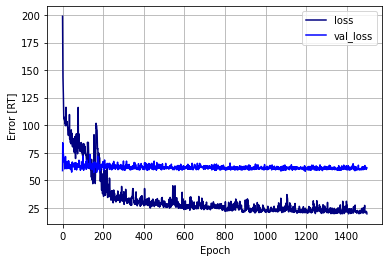

In [157]:
%%time
history = first_model.fit(
    train_features,
    train_labels,
    epochs = 1500,
    # batch_size = 300,
    verbose = 0,
    validation_split = 0.05)

plot_loss(history)

7/7 [==============================] - 0s 2ms/step


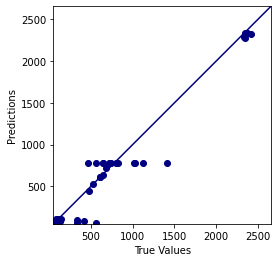

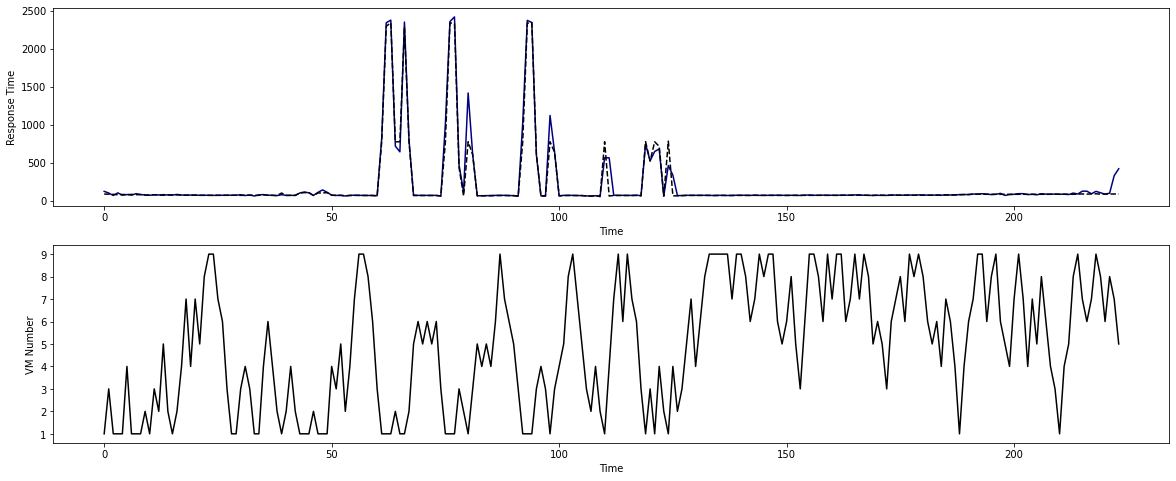

In [158]:
predicted_labels = first_model.predict(train_features)

plot_true_vs_pred(train_labels.values, predicted_labels)

plot_timeseries(train_labels.values, predicted_labels)

In [159]:
# Nem vagyok megelégedve az eredménnyel, mert:

# - a neurális háló nagyon érzékeny mindenre így nehéz összehasonlítanom az eredményeket.

# - nem sikerült még kiválasztanom a jó bemeneti változókat

# Hogy tovább tudjak lépni, most ezektől eltenkintek és elkészítem az a sub-routint ami kiszámolja a becslült
# válaszidőket az egyes fel-, leskálázási értékekehze.

# ---------------------------------------------------

# Mindenesetre a jelenlegi állás szerinte a neruális háló nagyon pontos ezen a fokon ilyen beálításokkal.

# LR modell megcsinálló

Minden metrikára megcsináljuk a tanítás és az LR modelleket elmenjük.

https://mljar.com/blog/save-load-scikit-learn-model

In [160]:
print(input_variables)

['request_rate', 'CPU0User%', '[TCPD]OutSegs']


In [161]:


ezeket a függvényeket beszervezni a notebook elejére



SyntaxError: invalid syntax (3948514741.py, line 1)

In [162]:
from sklearn.linear_model import LinearRegression

def create_term_for_metric(columnname: str):
    
    f1 = mf.copy()
    __next_name = columnname + 'Next'
    __prev_name = columnname + 'Prev'

    f1[__next_name] = f1[columnname].shift(-1)
    f1[__prev_name] = f1[columnname].shift(+1)
    
    f1 = f1.dropna()

    # Az lenne a korrekt ha kidobnám azokat ahol nem volt skálázás (delta_vm == 0)
    
    indexAge = f1[ (f1['delta_vm'] == 0) ].index
    f1.drop(indexAge , inplace=True)

    
    __metric_term1 = columnname + '_term1'
    __metric_term2 = columnname + '_term2'
    f1[__metric_term1] = f1[columnname] * f1['worker_number']/(f1['worker_number'] + f1['delta_vm'])
    f1[__metric_term2] = f1[columnname] * f1['delta_vm']/(f1['worker_number'] + f1['delta_vm'])
    
    __metric_term = f1[[__metric_term1, __metric_term2]]
    __metric_next = f1[__next_name]
    
    return __metric_term, __metric_next

def create_term_for_prediction(value: float, w: int, k: int):
    
    __metric_term1 = value * w/(w+k)
    __metric_term2 = value * k/(w+k)
    
    __metric_term = np.array([[__metric_term1, __metric_term2]])
    
    return __metric_term

def calc_pred_for_metric(__metric_term, __metric_next):

    lr = LinearRegression(fit_intercept=True)

    rr = lr.fit(__metric_term, __metric_next)

    __fit_score = rr.score(__metric_term, __metric_next)
    __fit_coef_ = rr.coef_
    __fit_intercept_ = rr.intercept_
    
    __pred_metric = rr.predict(__metric_term)
    
    return rr

In [163]:
import pickle
import os

os.system('rm -rf ./lr')
os.system('mkdir ./lr')
f = './lr/'

for i, metric in enumerate(input_variables):
    # megcsinálni a linreg modelt az adott metrikára (tanítás)
    __metric_term, __metric_next = create_term_for_metric(metric)
    __lr_model = calc_pred_for_metric(__metric_term.values, __metric_next.values)
    print(type(__lr_model))
    print(__lr_model.coef_)
    print('-------------------------------------------------------------------')
    print(__metric_term.shape)

    # file name, I'm using *.pickle as a file extension
    filename = f + str(metric) + '.pickle'

    # save model
    pickle.dump(__lr_model, open(filename, "wb"))

    # load model
    loaded_model = pickle.load(open(filename, "rb"))

    print(loaded_model.coef_)

<class 'sklearn.linear_model._base.LinearRegression'>
[1.02434361 1.15767578]
-------------------------------------------------------------------
(194, 2)
[1.02434361 1.15767578]
<class 'sklearn.linear_model._base.LinearRegression'>
[0.87016971 0.58266153]
-------------------------------------------------------------------
(194, 2)
[0.87016971 0.58266153]
<class 'sklearn.linear_model._base.LinearRegression'>
[0.88660233 0.42923089]
-------------------------------------------------------------------
(194, 2)
[0.88660233 0.42923089]


In [164]:
# Systematicly load

import pickle
import os

f = './lr/'

for i, metric in enumerate(input_variables):

    # file name, I'm using *.pickle as a file extension
    filename = f + str(metric) + '.pickle'
    
    # load model
    loaded_model = pickle.load(open(filename, "rb"))

    print(loaded_model.coef_)

[1.02434361 1.15767578]
[0.87016971 0.58266153]
[0.88660233 0.42923089]


## LR model megcsináló vége

In [165]:
# mindegyikhez elkészíteni hogy mi lenne a fel leskálázás utáni értéke

A = [i for i in range(-7, 8, 1)]

print(A)

# -2.
# inicalizálni egy üres dictianary-t a dict(action, predicted_response_time) pároknak
# r = []
# al = []
# rl = []
action = []
metrics = []
pred_response_times = []

# -1.
# kiválasztani, hogy milyen értéket mérek aktuális metrikákként
# ideiglenesen az mf utolsó értékei lesznek a bemenők

__N = 84

__current_response_time = mf['response_time'].values[__N]
__last_metrics = mf[input_variables].values[__N]
__w = mf['worker_number'].values[__N]

A = [i for i in range(-__w, 8, 1)]

print(A)

print('-----------------------------------------')
print('__last_metrics -> vagyis a current values')
with np.printoptions(precision=2, suppress=True):
    print(__last_metrics)
print(colored('__current_rt -> \t' + str(__current_response_time), 'red'))
print(colored('__w -> worker_number \t' + str(__w), 'red'))

print('-----------------------------------------')

print(input_variables)
print('-----------------------------------------')

for a in A:
    
    # Ez kell, hogy a VM szám (w) ne legyen 0
    if __w + a != 0:
    
        # 0.
        # inicializálni egy üres tömböt az input_variable változónak
        _new_train_features = np.zeros((1, mf[input_variables].shape[1]))


        # 1.
        # minden metrikára kiszámolni
        for i, metric in enumerate(input_variables):
            # print(i, metric)
            if metric != 'worker_number':

                # 2.
                # megcsinálni a linreg modelt az adott metrikára (tanítás)
                __metric_term, __metric_next = create_term_for_metric(metric)
                __lr_model = calc_pred_for_metric(__metric_term.values, __metric_next.values)
                
                # 3.
                # elmenetni az adott modelt (amit nem használok sehol)
                # _ = joblib.dump(__lr_model, './lr/lr_' + metric + '.joblib', compress=9)
                
                # 3.
                # az előbbi model alapján egy becslés egy konkrét értékre (value, w, k)
                __metric_term = create_term_for_prediction(__last_metrics[i], __w, a)                
                # print('---a metrica értékének becsése (value, w, k alapján ---')
                # print(__metric_term)
                # print(metric)
                # print(a)
                # print('------------------')
                __pred_metric = __lr_model.predict(__metric_term)
                
                # 4.
                # adott becsült metrikát bele kell helyezni a neurális háló bemeneti változójához
                _new_train_features[0, i] = __pred_metric
                # print(_new_train_features)
            
                
        # 5.
        # megvan az új a-hoz tartozó metika tömb, ez alapján becsüjük meg a válaszidőt
        with np.printoptions(precision=2, suppress=True):
            print(_new_train_features)
        
        # 5.a
        # basszuk már egy pandas datafaszba
        metrics.append(_new_train_features)
        
        # 6.
        # a neurális háló model segítségével megbecsülöm a válaszidőt
        
        __predicted_response_time = first_model.predict(_new_train_features, verbose = 0)
        
        # 6.a
        # basszuk már be a pandas datafaszba
        pred_response_times.append(__predicted_response_time)
        
        with np.printoptions(precision=2, suppress=True):
            print('action = ', a, ' --> rt --> ', __predicted_response_time, '\n')
            
        # 7.a
        # basszuk már be egy pandas datafaszba
        action.append(a)


# Basszus ezt az egészet basszuk már be egy pd.be hogy olavasható legyen

# A másik meg, hogy csináljak már több nn modelt és mentsem el őket külön néven
# aztán több model alapján is számojak, hogy lássam melyik milyen eredményt ad

# Pl most hozzáadtam a request ratet a modellhez és orbitális faszságot mond
# azt mondja, hogy nőne a válaszidő ha gépeket adnék hozzá (gratulálok)

[-7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7]
[-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7]
-----------------------------------------
__last_metrics -> vagyis a current values
[  39.9   32.5 2113.4]
__current_rt -> 	65.92055889724307
__w -> worker_number 	5
-----------------------------------------
['request_rate', 'CPU0User%', '[TCPD]OutSegs']
-----------------------------------------
[[  19.77   67.52 5836.64]]
action =  -4  --> rt -->  [[105.77]] 

[[  33.07   44.16 3420.12]]
action =  -3  --> rt -->  [[61.31]] 

[[  37.5    36.37 2614.61]]
action =  -2  --> rt -->  [[62.76]] 

[[  39.72   32.48 2211.85]]
action =  -1  --> rt -->  [[65.89]] 

[[  41.05   30.14 1970.2 ]]
action =  0  --> rt -->  [[67.47]] 

[[  41.93   28.58 1809.1 ]]
action =  1  --> rt -->  [[68.07]] 

[[  42.57   27.47 1694.03]]
action =  2  --> rt -->  [[68.32]] 

[[  43.04   26.64 1607.72]]
action =  3  --> rt -->  [[68.44]] 

[[  43.41   25.99 1540.6 ]]
action =  4  --> rt -->  [[68.51]] 

[[  43.71   25.

In [166]:
_action = np.array(action)
_pred_response_times = np.array(pred_response_times).flatten()
_metrics = np.array(metrics)
_metrics = np.squeeze(_metrics, axis=1)

fasz = np.dstack((_action, _pred_response_times))
# fasz = np.squeeze(fasz, 0)
# fasz = np.expand_dims(fasz, 0)

_metrics = np.expand_dims(_metrics, 0)

geci = np.dstack((fasz, _metrics))
geci = np.squeeze(geci, 0)

cnames = ['action', 'pred_rt'] + input_variables
pdf = pd.DataFrame(geci, columns=cnames)

# be is kéne színezni ezt a gecit a pred_rt-t
def color(val):
    if val > 0.9:
        color = 'green'
    elif val > 0.8:
        color = 'orange'
    else:
        color = 'yellow'
    font = 'white'
    return 'background-color: %s; color: %s' % (color, font)

pd.set_option('display.precision', 2)
pdf.style.applymap(color, subset=['pred_rt'])

# -- a current (valós) pedig

c =  np.expand_dims(np.expand_dims(np.array([__w, __current_response_time]), 0), 0)
_ = np.expand_dims(np.expand_dims(__last_metrics, 0), 0)
c = np.squeeze(np.dstack((c, _)), 0)
c = pd.DataFrame(c, columns=['curentw', 'real_rt'] + input_variables)

display(c)

# Na azért van egy két érdkesség

# pélé miért megy negatívba a cpu és a TCPInSegs (ja mert ott negatívba megy már a vm)

pdf.style.applymap(color, subset=['pred_rt'])


curentw  real_rt  request_rate  CPU0User%  [TCPD]OutSegs
0     5.00    65.92         39.90      32.50       2,113.40

In [167]:
# Az egy jó jel, hogyha nem változtatná a vm-ek számát vagyis a k=0, akkor a linreg becsés alapján
# adott új metrika érétkek
# és az ezek alapján adott becslése a válaszidőnek
# nagyon közel áll az éppen mért válaszidő értékéhez,
# ez egy nagyon jó jel, jele annak, hogy a két model jól működik

In [168]:
# A következő feladat

# Ha jól látom ez a Train10 könyvtár

# Tehát ebbe a könyvtárba megírni azt, hogy a feltanított modell alapján skálázzon,.

# És fontos az is, hogy ugyan itt legyen letárolva a terhelést végző jmx profil is,
# hogy ugyan az alapján tudjam terhelni ami alapján tanítottam.
# (egyezzenek a végpontok, stb.)

In [169]:
# Teendő 1

# Kiexportálni az itt feltanított model.

# Keras

first_model.save(os.getcwd())

# first_model.save('model.h5')


INFO:tensorflow:Assets written to: /home/ubuntu/Scaler/Train/Train15/assets


INFO:tensorflow:Assets written to: /home/ubuntu/Scaler/Train/Train15/assets


In [170]:

model = keras.models.load_model(os.getcwd())

# Let's check:
np.testing.assert_allclose(
    first_model.predict(_new_train_features), model.predict(_new_train_features)
)


1/1 [==============================] - 0s 64ms/step


In [171]:

def moric(__n, debug=False):
    'Az adatsorban minden elemre kiszámolja, hogy mi lett volna a válaszidő különböz k-mellett'
    
    'Azért az nem kéne elfelejeni, hogy csak olyan értékre számolja ki ami valós pl. negatív vm-re ne'
    
    results = []
    results_dict = []

    A = [i for i in range(-9, 10, 1)]

    # n-edik elem lesz kiválasztva a 'mf' dataframeből
    __N = __n

    __current_response_time = mf['response_time_p95'].values[__N]
    __last_metrics = mf[input_variables].values[__N]
    __w = mf['worker_number'].values[__N]
    
    if debug == True:
        print('RT = ', __current_response_time)
        print('w  = ', __w)
        with np.printoptions(precision=2, suppress=True):
            print(__last_metrics)

    for a in A:
        
        # negatív esetben legyen -_w + 1 (pl w=5, a=-7 akkor new_a = -5 + 1 = -4)
        if (__w + a) < 1:
            a = -__w + 1
        
        # ha több lenne mint a max_vm akkor 10 - _w (pl w=5 a=7 akkor new_a = 10 - 5 = 5)
        if (__w + a) > 10:
            a = 10-__w
        

        # Ez kell, hogy a VM szám (w) ne legyen 0
        if __w + a != 0:

            # 0.
            # inicializálni egy üres tömböt az input_variable változónak
            _new_train_features = np.zeros((1, mf[input_variables].shape[1]))

            # 1.
            # minden metrikára kiszámolni
            for i, metric in enumerate(input_variables):
                # print(i, metric)
                if metric != 'worker_number':

                    # 2.
                    # megcsinálni a linreg modelt az adott metrikára (tanítás)
                    __metric_term, __metric_next = create_term_for_metric(metric)
                    __lr_model = calc_pred_for_metric(__metric_term.values, __metric_next.values)

                    # 3.
                    # az előbbi model alapján egy becslés egy konkrét értékre (value, w, k)
                    __metric_term = create_term_for_prediction(__last_metrics[i], __w, a)                
                    __pred_metric = __lr_model.predict(__metric_term)

                    # 4.
                    # adott becsült metrikát bele kell helyezni a neurális háló bemeneti változójához
                    _new_train_features[0, i] = __pred_metric
                    # print(_new_train_features)

            # 5.
            # megvan az új a-hoz tartozó metika tömb, ez alapján becsüjük meg a válaszidőt
            if debug == True:
                with np.printoptions(precision=2, suppress=True):
                    print(_new_train_features)

            # 6.
            # a neurális háló model segítségével megbecsülöm a válaszidőt
            _ = time.time()
            __predicted_response_time = first_model.predict(_new_train_features, verbose = 0, batch_size=2000, use_multiprocessing=False)
            # print(time.time()-_)
            
            # X.
            # megpróbálom felgyorsítani, hogy a numpy számoja a pred válaszidőt
            # W = first_model.get_weights()
            # __px = predict(_new_train_features)
            # print(__px, __predicted_response_time.flatten()[0])
            
            results_dict.append({'action': a, 'prt': __predicted_response_time.flatten()[0]})
            results.append(__predicted_response_time.flatten()[0])
            
    return results


In [172]:
len(mf)

224

In [173]:
%%time
a_prts = []
# for i in range(4):
# for i in track(range(len(mf))):
for i in track(range(100)):
    _ = moric(i)
    a_prts.append(_)
    

Output()

2023-05-24 21:52:53.076325: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-24 21:53:00.104959: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-24 21:53:00.198284: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-24 21:53:19.853819: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-24 21:53:20.598760: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-24 21:53:21.858866: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-24 21:53:26.044425: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-24 21:53:34.303744: W tensorflow/core/data/root_dataset.cc:26

CPU times: user 2min 52s, sys: 4.48 s, total: 2min 57s
Wall time: 2min 55s


In [174]:
len(a_prts)

100

In [175]:
# ha különböző hosszú ez a fos akkor baj van

a = set()

for i in range(len(a_prts)):
    a.add(len(a_prts[i]))

a

{19}

In [176]:
# Ha csak egy részét akarom az idősornak vizsgálni

a = np.array(a_prts[0:len(a_prts)])
print(a.shape)


a = np.array(a_prts[0:100])
print(a.shape)


(100, 19)
(100, 19)


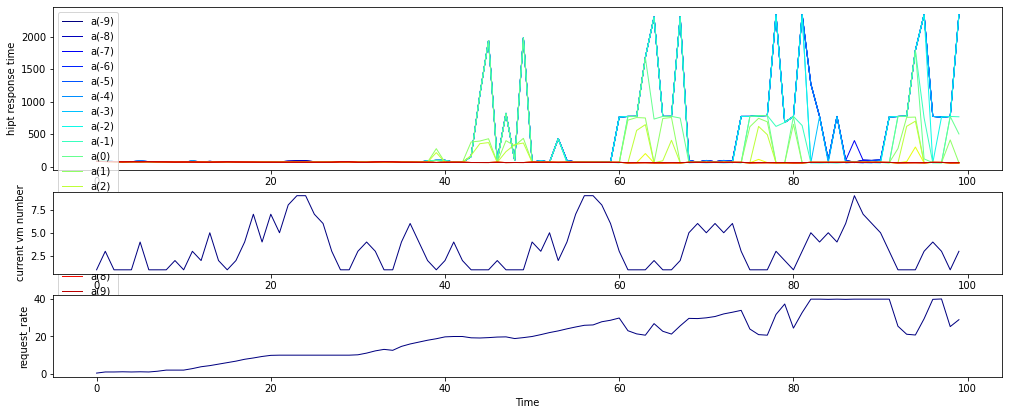

In [177]:
# Na ez itt nagyon összekapkotdott - dirty - az action számot most kihackelem - az egyáltalán nem biztos +


# https://matplotlib.org/stable/tutorials/colors/colormaps.html

import matplotlib as mpl
from cycler import cycler
mpl.rcParams['lines.linewidth'] = 1

colormap = plt.get_cmap('jet')
colors = [colormap(k) for k in np.linspace(0, 1, 20)]

mpl.rcParams['axes.prop_cycle'] = cycler(color=colors)

fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(17, 6.8), gridspec_kw={'height_ratios': [2, 1, 1]})
for i in range(a.shape[1]):
    ax0.plot(a[:, i], label='a('+str(i-9)+')') # ---------> dirty hack ! nem biztonságos
ax0.set_ylabel('hipt response time')
ax0.legend(loc=2)
ax1.plot(mf['worker_number'].values[0:100])
ax1.set_ylabel('current vm number')
ax2.plot(mf['request_rate'].values[0:100])
ax2.set_ylabel('request_rate')
ax2.set_xlabel('Time')
plt.show()

In [384]:
> Amit alább leírtam már megdölt de erről holnap (ez jó hír)

> azért lehet látni, hogy vannak még hibák (pl. 64) kevés az aktuális vm és mégis azt mondja hogy bármennyit
  adna hozzás nem menne le a válaszidő (valyon miért?) (ezen a ponton kell ránézni, hogy mire becsüli a
                                                        metrikákat)
> De amúgy jónak tűnik.

# ---

# Amit egyszerűen nehezen tudok a mai agyammal felfogni, hogy van az, hogy vannak olyan pontok az idősorban
# amikor tök mindegy hány új vm-et adnék hozzá azt mondja hogy mindíg ugyan az lenne a várható válaszidő.

# Hogy a pékbe van ez?
# Mi miatt van ez így?
# A linreg nem teszi adott helyen a megfellő helyre az új metrika értéket?
# Vagy a neurális háló?

# A fenti est kitűnő példa erre.

# Például a 40-ik eset pont ilyen.

# ---> 

# Lehet, hogy ez olyan helyeken fordul elő, ahol a current worker number maximumon van.

moric(40)

moric(40, debug=True)

RT =  84.772
w  =  9
[   22.7 89664.4    16.2   158.3  4139.4 82171.2 37952. ]
[[   97.08 90303.59    88.15   127.74  3450.36 81052.05 40970.89]]
[[   56.76 89898.14    49.16   138.98  3804.83 81106.83 39141.96]]
[[   43.32 89762.98    36.17   142.72  3922.98 81125.09 38532.31]]
[[   36.61 89695.41    29.67   144.6   3982.06 81134.22 38227.49]]
[[   32.57 89654.86    25.77   145.72  4017.51 81139.69 38044.6 ]]
[[   29.89 89627.83    23.17   146.47  4041.14 81143.35 37922.67]]
[[   27.97 89608.52    21.31   147.    4058.02 81145.95 37835.58]]
[[   26.53 89594.04    19.92   147.4   4070.68 81147.91 37770.26]]
[[   25.41 89582.78    18.84   147.72  4080.52 81149.43 37719.45]]
[[   24.51 89573.77    17.97   147.97  4088.4  81150.65 37678.81]]
[[   23.78 89566.4     17.26   148.17  4094.84 81151.65 37645.56]]
[[   23.17 89560.26    16.67   148.34  4100.22 81152.48 37617.85]]
[[   22.65 89555.06    16.17   148.48  4104.76 81153.18 37594.4 ]]
[[   22.21 89550.6     15.74   148.61  4108.66 811

[85.76027,
 61.860844,
 62.080505,
 63.90139,
 65.03315,
 65.268074,
 65.328476,
 65.3494,
 65.35842,
 65.36295,
 65.36551,
 65.36708,
 65.36812,
 65.36885,
 65.369385,
 65.3698,
 65.37012,
 65.37038]